# Age, gender, race recognition project

<a id="0"></a> <br>
 # Table of Contents
1. [Introduction](#1)\
&nbsp;&nbsp; 1.1 [Dataset description](#2)\
&nbsp;&nbsp; 1.2 [Project's scope and objectives](#3)\
2. [Import essential libraries](#4)
3. [Prepare dataframe with filenames and age/gender/race labels](#5)
4. [Show sample images with labels](#6)
5. [Basic EDA](#7)\
&nbsp;&nbsp; 5.1 [Age](#8)\
&nbsp;&nbsp; 5.2 [Gender](#9)\
&nbsp;&nbsp; 5.3 [Race](#10)
6. [Divide data into age groups](#11)\
&nbsp;&nbsp; 6.1 [Three age groups](#12)\
&nbsp;&nbsp; 6.2 [Seven age groups](#13)\
&nbsp;&nbsp; 6.3 [Eight age groups](#14)
7. [Prepare data for training and testing using Keras ImageDataGenerator with flow_from_dataframe() method](#15)\
&nbsp;&nbsp; 7.1 [Three age groups](#16)\
&nbsp;&nbsp; 7.2 [Seven age groups](#17)\
&nbsp;&nbsp; 7.3 [Eight age groups](#18)\
&nbsp;&nbsp; 7.4 [Gender](#19)\
&nbsp;&nbsp; 7.5 [Race](#20)
8. [Build, train and test prediction models based on CNN](#21)\
&nbsp;&nbsp; 8.1 [Create methods for model's building, training and testing](#22)\
&nbsp;&nbsp; 8.2 [Build, train and test first sample models](#23)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.2.1 [Three age groups](#24)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.2.3 [Seven age groups](#25)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.2.3 [Eight age groups](#26)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.2.4 [Gender](#27)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.2.5 [Race](#28)\
&nbsp;&nbsp; 8.3 [Hyperparameters tunning using Keras Tuner](#29)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.3.1 [Three age groups](#30)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.3.2 [Seven age groups](#31)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.3.3 [Eight age groups](#32)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.3.4 [Gender](#33)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.3.5 [Race](#34)
9. [Transfer Learning](#35)\
&nbsp;&nbsp; 9.1 [Create method for building transfer learning model](#36)\
&nbsp;&nbsp; 9.2 [Keras Applications transfer models](#37)\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 9.2.1 [MobileNet model](#38)\
&nbsp;&nbsp; 9.3 [Three age groups](#40)\
&nbsp;&nbsp; 9.4 [Seven age groups](#41)\
&nbsp;&nbsp; 9.5 [Eight age groups](#42)\
&nbsp;&nbsp; 9.6 [Gender](#43)\
&nbsp;&nbsp; 9.7 [Race](#44)
10. [Results](#45)
11. [Streamlit app](#46)

<a id="1"></a> 
# 1. Introduction

<a id="2"></a> 
## 1.1 Dataset description

[back to the top](#0)   

UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.

The labels of each face image are embedded in the file name, formated like age_gender_race_ date&time.jpg

Labels:
* 'age' is an integer from 0 to 116, indicating the age
* 'gender' is either 0 (male) or 1 (female)
* 'race' is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

Dataset obtained from https://susanqq.github.io/UTKFace/


<a id="3"></a> 
## 1.2 Projects scope and objectives
[back to the top](#0) 

This is final project summarizing a knowledge obtained during Data Science PRO bootcampby Kodołamacz (Sages).

Project scope consists of building the models for age, gender and race recognision beased on face images from UTKFace dataset. 

The objective is to try to find optimal parameters of convolutional neural network to achieve the best possible accuracy.

Technologies used in the project:
* Python
* Pandas
* Matplotlib
* Scikit-learn
* Tensorflow/Keras


<a id="4"></a> 
# 2. Import essential libraries
[back to the top](#0) 

In [1]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Resizing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNet, EfficientNetV2B0, VGG16, Xception, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from sklearn.metrics import roc_auc_score, accuracy_score
import random
import cv2
import os

<a id="5"></a> 
# 3. Prepare dataframe with filenames and age/gender/race labels
[back to the top](#0)

In [2]:
files = {"FileName": os.listdir('new_data/images')}

In [3]:
face_df = pd.DataFrame(files)

In [4]:
face_df['age'] = face_df['FileName'].apply(lambda x: int(x.split('_')[0]))

In [5]:
face_df['gender'] = face_df['FileName'].apply(lambda x: int(x.split('_')[1]))

In [6]:
face_df['race'] = face_df['FileName'].apply(lambda x: int(x.split('_')[2]))

In [7]:
face_df.head()

,FileName,age,gender,race
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0,0
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0,0
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1,0
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1,0
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1,0


In [8]:
face_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23350 entries, 0 to 23349
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FileName  23350 non-null  object
 1   age       23350 non-null  int64 
 2   gender    23350 non-null  int64 
 3   race      23350 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 729.8+ KB


<a id="6"></a> 
# 4. Show sample images with labels
[back to the top](#0) 

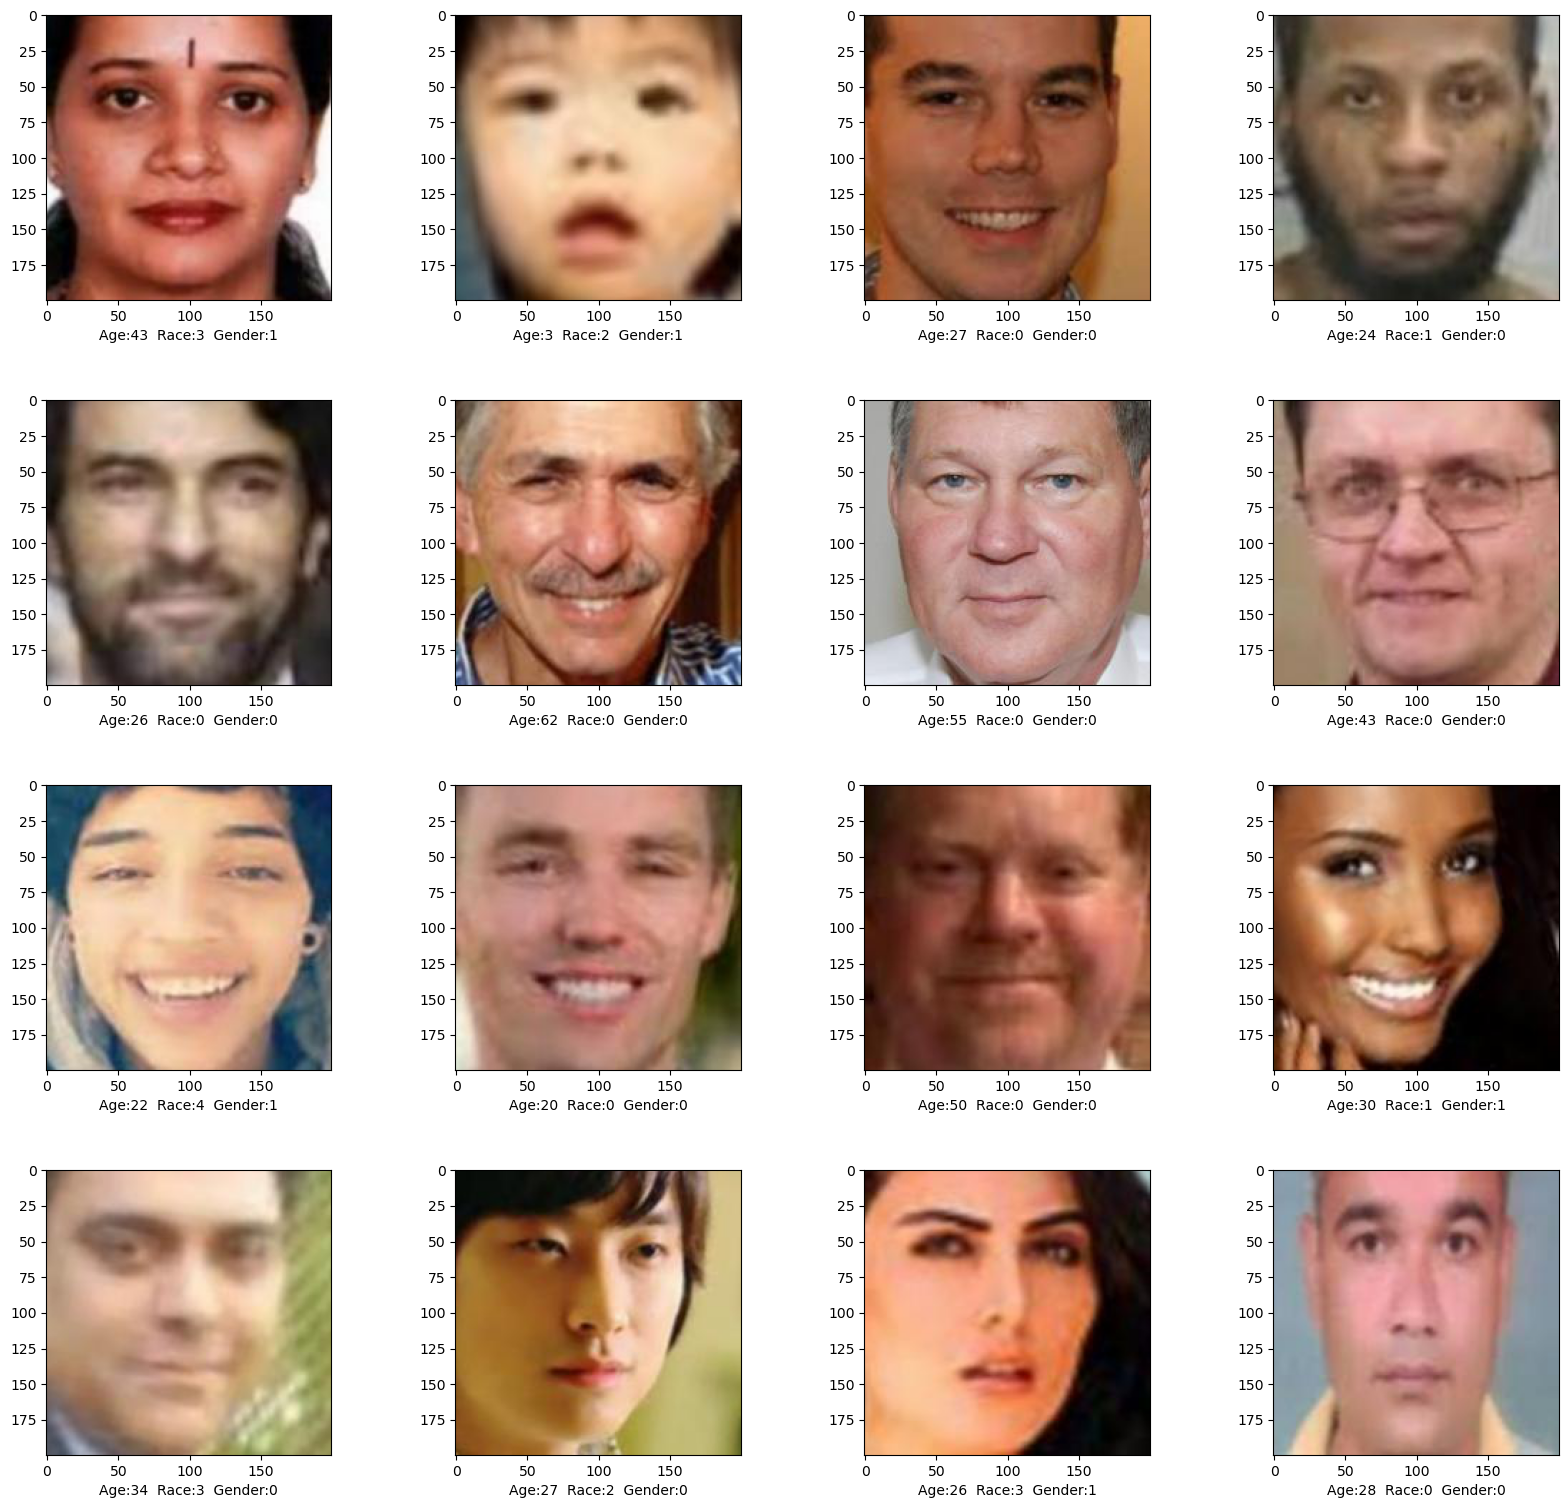

In [9]:
n_col = 4
n_row = 4
plt.figure(figsize=(16, 16))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
images_to_display = face_df.sample(16)
for i in range(n_row * n_col):
    image_to_display = images_to_display['FileName'].iloc[i]
    plt.subplot(n_row, n_col, i + 1)
    path = f'new_data/images/{image_to_display}'
    image = mpimg.imread(path)
    plt.imshow(image)
    plt.xlabel(
        "Age:"+str(images_to_display['age'].iloc[i])+
        "  Race:"+str(images_to_display['race'].iloc[i])+
        "  Gender:"+ str(images_to_display['gender'].iloc[i])
    )
    
plt.show()

<a id="7"></a> 
# 5. Basic EDA
[back to the top](#0) 

<a id="8"></a> 
## 5.1 Age
[back to the top](#0)

Most images are showing peaople in the age between 20 and 40 years with vast majority being between 25 and 30 years old.

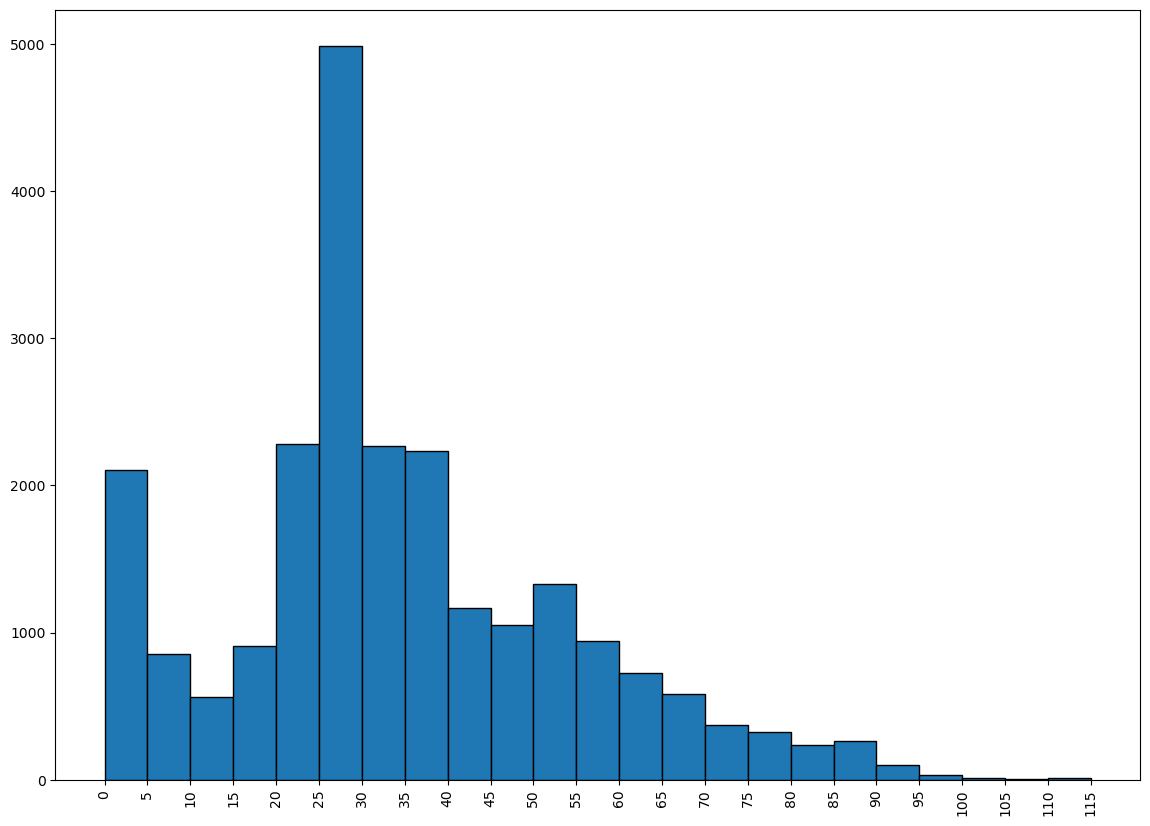

In [10]:
bins = range(0, 120, 5)
plt.figure(figsize=(14, 10))
plt.hist(face_df['age'], bins=bins, edgecolor='black')
plt.xticks(bins, rotation=90)
plt.show()

<a id="9"></a> 
## 5.2 Gender
[back to the top](#0)

There is close to 50/50 split between females and males.

<Axes: >

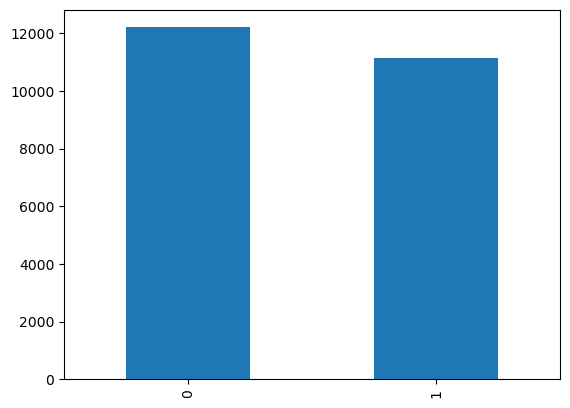

In [11]:
face_df['gender'].value_counts().plot(kind='bar')

<a id="10"></a> 
## 5.3 Race
[back to the top](#0)

Most images presents people of white race. The smallest group are Others.

<Axes: >

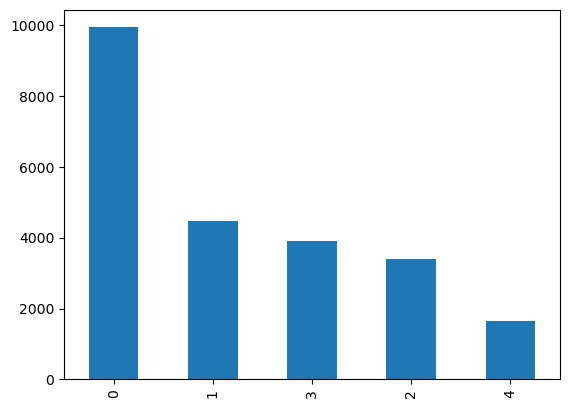

In [12]:
face_df['race'].value_counts().plot(kind='bar')

<a id="11"></a> 
# 6. Divide data into age groups
[back to the top](#0)

<a id="12"></a> 
### 6.1 Three age groups
[back to the top](#0)

Data was divided into 3 age groups: 
* 0: 0-17 years old 
* 1: 18-60 years old
* 2: above 60 years old

In [13]:
def define_3_age_group_categories(age):
    if age < 18:
        return 0
    elif age <= 60:
        return 1
    else:
        return 2

In [14]:
face_df['age_group_cat3'] = face_df['age'].map(define_3_age_group_categories)

In [15]:
face_df.head()

,FileName,age,gender,race,age_group_cat3
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0,0,2
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0,0,2
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1,0,2
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1,0,2
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1,0,2


<Axes: >

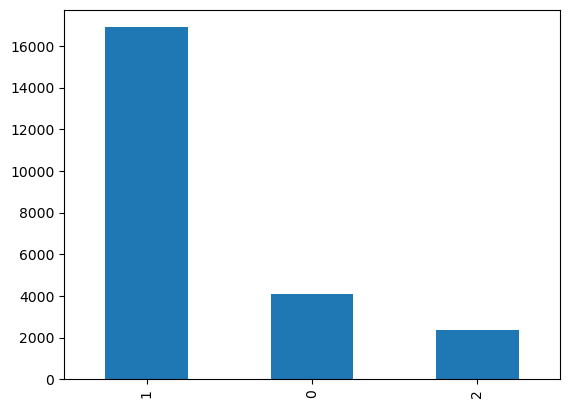

In [16]:
face_df['age_group_cat3'].value_counts().plot(kind='bar')

<a id="13"></a> 
### 6.2 Seven age groups
[back to the top](#0)

Data was divided into 7 age groups: 
* 0: 0-2 years old
* 1: 3-9 years old
* 2: 10-17 years old
* 3: 18-34 years old
* 4: 35-59 years old
* 5: 60-79 years old
* 6: 80 years old and above

In [17]:
def define_7_age_group_categories(age):
    if age <= 2:
        return 0
    elif age < 10:
        return 1
    elif age < 18:
        return 2
    elif age < 35:
        return 3
    elif age < 60:
        return 4
    elif age < 80:
        return 5
    else:
        return 6

In [18]:
face_df['age_group_cat7'] = face_df['age'].map(define_7_age_group_categories)

In [19]:
face_df.head()

,FileName,age,gender,race,age_group_cat3,age_group_cat7
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0,0,2,6
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0,0,2,6
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1,0,2,6
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1,0,2,6
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1,0,2,6


<Axes: >

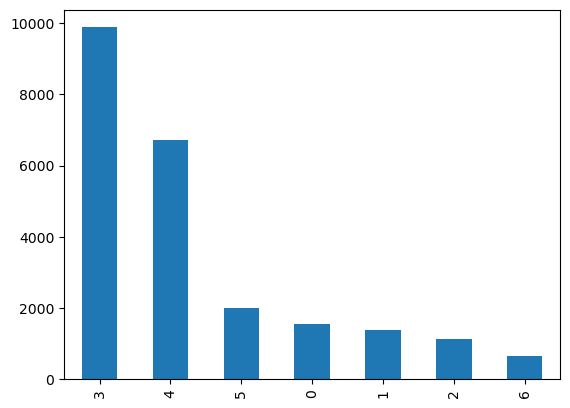

In [20]:
face_df['age_group_cat7'].value_counts().plot(kind='bar')

<a id="14"></a> 
### 6.3 Eight age groups
[back to the top](#0)

Data was divided into 8 age groups: 
* 0: 0-10 years old
* 1: 11-20 years old
* 2: 21-30 years old
* 3: 31-40 years old
* 4: 41-50 years old
* 5: 51-60 years old
* 6: 61-70 years old
* 7: 71 years old and above

In [21]:
def define_8_age_group_categories(age):
    if age <= 10:
        return 0
    elif age <= 20:
        return 1
    elif age <= 30:
        return 2
    elif age <= 40:
        return 3
    elif age <= 50:
        return 4
    elif age <= 60:
        return 5
    elif age <= 70:
        return 6
    else:
        return 7

In [22]:
face_df['age_group_cat8'] = face_df['age'].map(define_8_age_group_categories)

In [23]:
face_df.head()

,FileName,age,gender,race,age_group_cat3,age_group_cat7,age_group_cat8
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0,0,2,6,7
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0,0,2,6,7
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1,0,2,6,7
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1,0,2,6,7
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1,0,2,6,7


<Axes: >

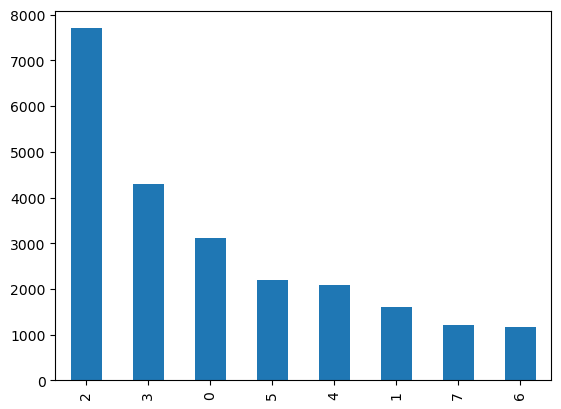

In [24]:
face_df['age_group_cat8'].value_counts().plot(kind='bar')

<a id="15"></a> 
## 7. Prepare data for training and testing using Keras ImageDataGenerator with flow_from_dataframe() method
[back to the top](#0)

All images are in one folder. To avoid manuallly creating train, test and validation folders I decided to use flow_from_dataframe() method from Keras ImageDataGenerator and split the data automatically to train and test data using train_test_split() method from Scikit-learn.

<a id="16"></a> 
### 7.1 Three age groups
[back to the top](#0)

#### Train and test data

In [25]:
X_age3 = face_df['FileName']
y_age3 = face_df['age_group_cat3']

In [26]:
# Divide into train and test data 
X_train_age3, X_test_age3, y_train_age3, y_test_age3 = train_test_split(X_age3, y_age3, test_size=0.2, stratify=y_age3)

In [27]:
# Create training dataframe from divided data
X_train_age3 = X_train_age3.reset_index(drop=True)
y_train_age3 = y_train_age3.reset_index(drop=True)
dict_train_age3 = {"x_col": X_train_age3, "y_col": y_train_age3}
df_train_age3 = pd.DataFrame(dict_train_age3)

In [28]:
# Create testing dataframe from divided data
X_test_age3 = X_test_age3.reset_index(drop=True)
y_test_age3 = y_test_age3.reset_index(drop=True)
dict_test_age3 = {"x_col": X_test_age3, "y_col": y_test_age3}
df_test_age3 = pd.DataFrame(dict_test_age3)

In [29]:
# Convert integer labels into string labels
df_train_age3['y_col'] = df_train_age3['y_col'].apply(lambda x: str(x))
df_test_age3['y_col'] = df_test_age3['y_col'].apply(lambda x: str(x))

In [30]:
df_train_age3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18680 entries, 0 to 18679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_col   18680 non-null  object
 1   y_col   18680 non-null  object
dtypes: object(2)
memory usage: 292.0+ KB


In [31]:
df_test_age3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_col   4670 non-null   object
 1   y_col   4670 non-null   object
dtypes: object(2)
memory usage: 73.1+ KB


#### Create train, validation and test dataflow

In [32]:
h, w = 200, 200
batch_size = 64
n_classes_age3 = 3

In [33]:
# creating ImageDataGenerator object for training data, split data into training and validation subsets (80/20)
datagen_age3=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

In [34]:
# creating training dataflow
train_generator_age3=datagen_age3.flow_from_dataframe(dataframe=df_train_age3, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="training", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="categorical", 
                                                      target_size=(h, w))

Found 14944 validated image filenames belonging to 3 classes.


In [35]:
# creating validation dataflow
valid_generator_age3=datagen_age3.flow_from_dataframe(dataframe=df_train_age3, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="validation", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="categorical", 
                                                      target_size=(h, w))

Found 3736 validated image filenames belonging to 3 classes.


In [36]:
# creating ImageDataGenerator object for testing data
test_datagen_age3=ImageDataGenerator(rescale=1./255.)

In [37]:
# creating test dataflow
test_generator_age3=test_datagen_age3.flow_from_dataframe(dataframe=df_test_age3, 
                                                          directory="./new_data/images", 
                                                          x_col="x_col", 
                                                          y_col="y_col", 
                                                          batch_size=batch_size, 
                                                          seed=42, 
                                                          shuffle=False, 
                                                          class_mode="categorical", 
                                                          target_size=(h, w))

Found 4670 validated image filenames belonging to 3 classes.


<a id="17"></a> 
### 7.2 Seven age groups
[back to the top](#0)

In [38]:
X_age7 = face_df['FileName']
y_age7 = face_df['age_group_cat7']

In [39]:
# Divide into train and test data 
X_train_age7, X_test_age7, y_train_age7, y_test_age7 = train_test_split(X_age7, y_age7, test_size=0.2, stratify=y_age7)

In [40]:
# Create training dataframe from divided data
X_train_age7 = X_train_age7.reset_index(drop=True)
y_train_age7 = y_train_age7.reset_index(drop=True)
train_dict_age7 = {"x_col": X_train_age7, "y_col": y_train_age7}
df_train_age7 = pd.DataFrame(train_dict_age7)

In [41]:
# Create testing dataframe from divided data
X_test_age7 = X_test_age7.reset_index(drop=True)
y_test_age7 = y_test_age7.reset_index(drop=True)
test_dict_age7 = {"x_col": X_test_age7, "y_col": y_test_age7}
df_test_age7 = pd.DataFrame(test_dict_age7)

In [42]:
# Convert integer labels into string labels
df_train_age7['y_col'] = df_train_age7['y_col'].apply(lambda x: str(x))
df_test_age7['y_col'] = df_test_age7['y_col'].apply(lambda x: str(x))

In [43]:
df_train_age7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18680 entries, 0 to 18679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_col   18680 non-null  object
 1   y_col   18680 non-null  object
dtypes: object(2)
memory usage: 292.0+ KB


In [44]:
df_test_age7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_col   4670 non-null   object
 1   y_col   4670 non-null   object
dtypes: object(2)
memory usage: 73.1+ KB


#### Create train, validation and test dataflow

In [45]:
h, w = 200, 200
batch_size = 64
n_classes_age7 = 7

In [46]:
# creating ImageDataGenerator object for training data, split data into training and validation subsets (80/20)
datagen_age7=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

In [47]:
# creating training dataflow
train_generator_age7=datagen_age7.flow_from_dataframe(dataframe=df_train_age7, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="training", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="categorical", 
                                                      target_size=(h, w))

Found 14944 validated image filenames belonging to 7 classes.


In [48]:
# creating validation dataflow
valid_generator_age7=datagen_age7.flow_from_dataframe(dataframe=df_train_age7, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="validation", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="categorical", 
                                                      target_size=(h, w))

Found 3736 validated image filenames belonging to 7 classes.


In [49]:
# creating ImageDataGenerator object for testing data
test_datagen_age7=ImageDataGenerator(rescale=1./255.)

In [50]:
# creating test dataflow
test_generator_age7=test_datagen_age7.flow_from_dataframe( dataframe=df_test_age7, 
                                                     directory="./new_data/images", 
                                                     x_col="x_col", 
                                                     y_col="y_col", 
                                                     batch_size=batch_size, 
                                                     seed=42, 
                                                     shuffle=False, 
                                                     class_mode="categorical", 
                                                     target_size=(h, w))

Found 4670 validated image filenames belonging to 7 classes.


<a id="18"></a> 
### 7.3 Eight age groups
[back to the top](#0)

In [51]:
X_age8 = face_df['FileName']
y_age8 = face_df['age_group_cat8']

In [52]:
# Divide into train and test data
X_train_age8, X_test_age8, y_train_age8, y_test_age8 = train_test_split(X_age8, y_age8, test_size=0.2, stratify=y_age8)

In [53]:
# Create training dataframe from divided data
X_train_age8 = X_train_age8.reset_index(drop=True)
y_train_age8 = y_train_age8.reset_index(drop=True)
train_dict_age8 = {"x_col": X_train_age8, "y_col": y_train_age8}
df_train_age8 = pd.DataFrame(train_dict_age8)

In [54]:
# Create testing dataframe from divided data
X_test_age8 = X_test_age8.reset_index(drop=True)
y_test_age8 = y_test_age8.reset_index(drop=True)
test_dict_age8 = {"x_col": X_test_age8, "y_col": y_test_age8}
df_test_age8 = pd.DataFrame(test_dict_age8)

In [55]:
# Convert integer labels into string labels
df_train_age8['y_col'] = df_train_age8['y_col'].apply(lambda x: str(x))
df_test_age8['y_col'] = df_test_age8['y_col'].apply(lambda x: str(x))

In [56]:
df_train_age8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18680 entries, 0 to 18679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_col   18680 non-null  object
 1   y_col   18680 non-null  object
dtypes: object(2)
memory usage: 292.0+ KB


In [57]:
df_test_age8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_col   4670 non-null   object
 1   y_col   4670 non-null   object
dtypes: object(2)
memory usage: 73.1+ KB


#### Create train, validation and test dataflow

In [58]:
h, w = 200, 200
batch_size = 64
n_classes_age8 = 8

In [59]:
# creating ImageDataGenerator object for training data, split data into training and validation subsets (80/20)
datagen_age8=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

In [60]:
# creating training dataflow
train_generator_age8=datagen_age8.flow_from_dataframe(dataframe=df_train_age8, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="training", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="categorical", 
                                                      target_size=(h, w))

Found 14944 validated image filenames belonging to 8 classes.


In [61]:
# creating validation dataflow
valid_generator_age8=datagen_age8.flow_from_dataframe(dataframe=df_train_age8, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="validation", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="categorical", 
                                                      target_size=(h, w))

Found 3736 validated image filenames belonging to 8 classes.


In [62]:
# creating ImageDataGenerator object for testing data
test_datagen_age8=ImageDataGenerator(rescale=1./255.)

In [63]:
# creating test dataflow
test_generator_age8=test_datagen_age8.flow_from_dataframe( dataframe=df_test_age8, 
                                                     directory="./new_data/images", 
                                                     x_col="x_col", 
                                                     y_col="y_col", 
                                                     batch_size=batch_size, 
                                                     seed=42, 
                                                     shuffle=False, 
                                                     class_mode="categorical", 
                                                     target_size=(h, w))

Found 4670 validated image filenames belonging to 8 classes.


<a id="19"></a> 
### 7.4 Gender
[back to the top](#0)

In [64]:
X_gend = face_df['FileName']

In [65]:
y_gend = face_df['gender']

In [66]:
# Divide into train and test data
X_train_gend, X_test_gend, y_train_gend, y_test_gend = train_test_split(X_gend, y_gend, test_size=0.2, stratify=y_gend)

In [67]:
# Create training dataframe from divided data
X_train_gend = X_train_gend.reset_index(drop=True)
y_train_gend = y_train_gend.reset_index(drop=True)
train_dict_gend = {"x_col": X_train_gend, "y_col": y_train_gend}
df_train_gend = pd.DataFrame(train_dict_gend)

In [68]:
# Create testing dataframe from divided data
X_test_gend = X_test_gend.reset_index(drop=True)
y_test_gend = y_test_gend.reset_index(drop=True)
test_dict_gend = {"x_col": X_test_gend, "y_col": y_test_gend}
df_test_gend = pd.DataFrame(test_dict_gend)

In [69]:
# Convert integer labels into string labels
df_train_gend['y_col'] = df_train_gend['y_col'].apply(lambda x: str(x))
df_test_gend['y_col'] = df_test_gend['y_col'].apply(lambda x: str(x))

#### Create train, validation and test dataflow

In [70]:
h, w = 200, 200
batch_size = 64

In [71]:
# creating ImageDataGenerator object for training data, split data into training and validation subsets (80/20)
datagen_gend=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

In [72]:
# creating training dataflow
train_generator_gend=datagen_gend.flow_from_dataframe(dataframe=df_train_gend, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="training", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="binary", 
                                                      target_size=(h, w))

Found 14944 validated image filenames belonging to 2 classes.


In [73]:
# creating validation dataflow
valid_generator_gend=datagen_gend.flow_from_dataframe(dataframe=df_train_gend, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="validation", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="binary", 
                                                      target_size=(h, w))

Found 3736 validated image filenames belonging to 2 classes.


In [74]:
# creating ImageDataGenerator object for testing data
test_datagen_gend=ImageDataGenerator(rescale=1./255.)

In [75]:
# creating test dataflow
test_generator_gend=test_datagen_gend.flow_from_dataframe( dataframe=df_test_gend, 
                                                     directory="./new_data/images", 
                                                     x_col="x_col", 
                                                     y_col="y_col", 
                                                     batch_size=batch_size, 
                                                     seed=42, 
                                                     shuffle=False, 
                                                     class_mode="binary", 
                                                     target_size=(h, w))

Found 4670 validated image filenames belonging to 2 classes.


<a id="20"></a> 
### 7.5 Race
[back to the top](#0)

In [76]:
X_race = face_df['FileName']

In [77]:
y_race = face_df['race']

In [78]:
# Divide into train and test data
X_train_race, X_test_race, y_train_race, y_test_race = train_test_split(X_race, y_race, test_size=0.2, stratify=y_race)

In [79]:
# Create training dataframe from divided data
X_train_race = X_train_race.reset_index(drop=True)
y_train_race = y_train_race.reset_index(drop=True)
train_dict_race = {"x_col": X_train_race, "y_col": y_train_race}
df_train_race = pd.DataFrame(train_dict_race)

In [80]:
# Create testing dataframe from divided data
X_test_race = X_test_race.reset_index(drop=True)
y_test_race = y_test_race.reset_index(drop=True)
test_dict_race = {"x_col": X_test_race, "y_col": y_test_race}
df_test_race = pd.DataFrame(test_dict_race)

In [81]:
# Convert integer labels into string labels
df_train_race['y_col'] = df_train_race['y_col'].apply(lambda x: str(x))
df_test_race['y_col'] = df_test_race['y_col'].apply(lambda x: str(x))

#### Create train, validation and test dataflow

In [82]:
h, w = 200, 200
batch_size = 64
n_classes_race = 5

In [83]:
# creating ImageDataGenerator object for training data, split data into training and validation subsets (80/20)
datagen_race=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

In [84]:
# creating training dataflow
train_generator_race=datagen_race.flow_from_dataframe(dataframe=df_train_race, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="training", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="categorical", 
                                                      target_size=(h, w))

Found 14944 validated image filenames belonging to 5 classes.


In [85]:
# creating validation dataflow
valid_generator_race=datagen_race.flow_from_dataframe(dataframe=df_train_race, 
                                                      directory="./new_data/images", 
                                                      x_col="x_col", 
                                                      y_col="y_col", 
                                                      subset="validation", 
                                                      batch_size=batch_size, 
                                                      seed=42, 
                                                      shuffle=True, 
                                                      class_mode="categorical", 
                                                      target_size=(h, w))

Found 3736 validated image filenames belonging to 5 classes.


In [86]:
# creating ImageDataGenerator object for testing data
test_datagen_race=ImageDataGenerator(rescale=1./255.)

In [87]:
# creating test dataflow
test_generator_race=test_datagen_race.flow_from_dataframe( dataframe=df_test_race, 
                                                     directory="./new_data/images", 
                                                     x_col="x_col", 
                                                     y_col="y_col", 
                                                     batch_size=batch_size, 
                                                     seed=42, 
                                                     shuffle=False, 
                                                     class_mode="categorical", 
                                                     target_size=(h, w))

Found 4670 validated image filenames belonging to 5 classes.


<a id="21"></a> 
# 8. Build, train and test prediction models based on CNN
[back to the top](#0)

<a id="22"></a> 
## 8.1 Create methods for model's building, training and testing 
[back to the top](#0)

In [88]:
# method that build and compile new CNN model based on the parameters supplied
def create_model(input_shape, no_of_classes, 
                 optimizer=Adam, 
                 conv_filters=[(32, 3), (16, 3)], 
                 pooling=(), 
                 dense_layer_sizes=(32,), 
                 dropout_rate=0, 
                 batch_normalization=False,
                 conv_kernel_regularizer=None,
                 dense_kernel_regularizer=None,
                 activation_fun="relu", 
                 output_fun='softmax', 
                 learning_rate=0.001, 
                 loss="categorical_crossentropy", 
                 metrics=["categorical_accuracy"]):
      
    model = Sequential()
    #adding first convolution layer
    model.add(Conv2D(filters=conv_filters[0][0], 
                     kernel_size=conv_filters[0][1], 
                     activation=activation_fun, 
                     input_shape=input_shape))
    
    #adding MaxPool after first layer (if applicable)
    if len(pooling) > 0:
        model.add(MaxPool2D(pooling))
        
    #adding Dropout after first layer (if applicable)    
    if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
            
    #adding remaining convolution layers and MaxPool in A loop, 
    #conv_filters is list of tuples with parameters for each conv layer [(filters ,kernel_size)] 
    #pooling is list of tuples with paramaters of MaxPool for each layer 
    for f in range(1, len(conv_filters)):
        model.add(Conv2D(filters=conv_filters[f][0], kernel_size=conv_filters[f][1], 
                         kernel_regularizer=conv_kernel_regularizer, activation=activation_fun))
        if len(pooling) > 0:
            model.add(MaxPool2D(pooling))
        #adding Dropout after each layer (if applicable)    
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
        if batch_normalization:
            model.add(BatchNormalization())
            
    #flattening            
    model.add(Flatten())
    
    #adding Dense layer in the loop (layer_sizes is tupple with number of neurons in each layer)
    for s in range(len(dense_layer_sizes)):
        model.add(Dense(dense_layer_sizes[s], kernel_regularizer=dense_kernel_regularizer, activation=activation_fun))   
        
    #adding last Dense layer
    model.add(Dense(no_of_classes, activation=output_fun)) 
    
    print(model.summary())
    
    #model compiling
    model.compile(loss=loss, 
                  optimizer=optimizer(learning_rate = learning_rate), 
                  metrics=metrics) 
    
    return model

In [89]:
# method that trains the model with optional early stopping
def train_model(train_data, validation_data, model, es_patience=0, epochs=10):
    if es_patience>0:
        early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=es_patience, 
                               restore_best_weights=True)
    else:
        early_stopping = []
    
    model.fit(train_data,
              validation_data=validation_data,
              callbacks=[early_stopping],
              epochs=epochs)

In [90]:
# method that test the model and return accuracy score
def test_model(model, test_data):    
    score = model.evaluate(test_data)
    return score

<a id="23"></a> 
## 8.2 Build, train and test first sample models
[back to the top](#0)

<a id="24"></a>
### 8.2.1 Three age groups
[back to the top](#0)

In [91]:
model1_age3 = create_model(conv_filters=[(32, 3), (16, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 24)                8

In [176]:
train_model(train_generator_age3, valid_generator_age3, model1_age3, epochs=5)

Epoch 1/5
234/234 [==============================] - 160s 681ms/step - loss: 0.5763 - categorical_accuracy: 0.7933 - val_loss: 0.4080 - val_categorical_accuracy: 0.8418
Epoch 2/5
234/234 [==============================] - 165s 702ms/step - loss: 0.4048 - categorical_accuracy: 0.8400 - val_loss: 0.3773 - val_categorical_accuracy: 0.8472
Epoch 3/5
234/234 [==============================] - 155s 661ms/step - loss: 0.3562 - categorical_accuracy: 0.8601 - val_loss: 0.3300 - val_categorical_accuracy: 0.8779
Epoch 4/5
234/234 [==============================] - 154s 659ms/step - loss: 0.2994 - categorical_accuracy: 0.8891 - val_loss: 0.3294 - val_categorical_accuracy: 0.8782
Epoch 5/5
234/234 [==============================] - 155s 662ms/step - loss: 0.2749 - categorical_accuracy: 0.8947 - val_loss: 0.3510 - val_categorical_accuracy: 0.8683


In [179]:
print("Accuracy: ", test_model(model1_age3, test_generator_age3)[1])

73/73 [==============================] - 12s 167ms/step - loss: 0.3598 - categorical_accuracy: 0.8685
Accuracy:  0.8685224652290344


In [92]:
model2_age3 = create_model(conv_filters=[(128, 3), (64, 3), (32, 3)], 
                            pooling=(2, 2), 
                            dense_layer_sizes=(24,),
                            input_shape=(h, w, 3), 
                            no_of_classes=n_classes_age3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)      

In [109]:
train_model(train_generator_age3, valid_generator_age3, model2_age3, epochs=5)

Epoch 1/5


KeyboardInterrupt: 

In [65]:
print("Accuracy: ", test_model(model2_age3, test_generator_age3))

75/75 [==============================] - 111s 1s/step - loss: 0.3442 - categorical_accuracy: 0.8740
Accuracy:  [0.34420129656791687, 0.8740240335464478]


In [93]:
model3_age3 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 128)     

In [64]:
train_model(train_generator_age3, valid_generator_age3, model3_age3, epochs=5)

Epoch 1/5
252/252 [==============================] - 453s 2s/step - loss: 0.5754 - categorical_accuracy: 0.7900 - val_loss: 0.4047 - val_categorical_accuracy: 0.8400
Epoch 2/5
252/252 [==============================] - 455s 2s/step - loss: 0.3769 - categorical_accuracy: 0.8610 - val_loss: 0.3567 - val_categorical_accuracy: 0.8684
Epoch 3/5
252/252 [==============================] - 454s 2s/step - loss: 0.3035 - categorical_accuracy: 0.8900 - val_loss: 0.3141 - val_categorical_accuracy: 0.8846
Epoch 4/5
252/252 [==============================] - 446s 2s/step - loss: 0.2666 - categorical_accuracy: 0.9019 - val_loss: 0.3025 - val_categorical_accuracy: 0.8857
Epoch 5/5
252/252 [==============================] - 446s 2s/step - loss: 0.2319 - categorical_accuracy: 0.9158 - val_loss: 0.2902 - val_categorical_accuracy: 0.8945


In [65]:
print("Accuracy: ", test_model(model3_age3, test_generator_age3))

75/75 [==============================] - 40s 533ms/step - loss: 0.2931 - categorical_accuracy: 0.8945
Accuracy:  [0.29308295249938965, 0.894492506980896]


In [94]:
model4_age3 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0.25,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)       

In [67]:
train_model(train_generator_age3, valid_generator_age3, model4_age3, epochs=5)

Epoch 1/5
252/252 [==============================] - 515s 2s/step - loss: 0.6517 - categorical_accuracy: 0.7504 - val_loss: 0.4829 - val_categorical_accuracy: 0.8189
Epoch 2/5
252/252 [==============================] - 513s 2s/step - loss: 0.4284 - categorical_accuracy: 0.8429 - val_loss: 0.3806 - val_categorical_accuracy: 0.8597
Epoch 3/5
252/252 [==============================] - 516s 2s/step - loss: 0.3584 - categorical_accuracy: 0.8702 - val_loss: 0.3363 - val_categorical_accuracy: 0.8699
Epoch 4/5
252/252 [==============================] - 516s 2s/step - loss: 0.3115 - categorical_accuracy: 0.8835 - val_loss: 0.3056 - val_categorical_accuracy: 0.8839
Epoch 5/5
252/252 [==============================] - 516s 2s/step - loss: 0.2886 - categorical_accuracy: 0.8958 - val_loss: 0.3087 - val_categorical_accuracy: 0.8843


In [68]:
print("Accuracy: ", test_model(model4_age3, test_generator_age3)[1])

75/75 [==============================] - 40s 534ms/step - loss: 0.2932 - categorical_accuracy: 0.8903
Accuracy:  0.8902722001075745


In [95]:
model5_age3 = create_model(conv_filters=[(128, 3), (64, 3), (32, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0.25,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 99, 99, 128)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 99, 99, 128)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 97, 97, 64)        73792     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 64)       

In [70]:
train_model(train_generator_age3, valid_generator_age3, model5_age3, epochs=10)

Epoch 1/10
252/252 [==============================] - 1610s 6s/step - loss: 0.6110 - categorical_accuracy: 0.7720 - val_loss: 0.4705 - val_categorical_accuracy: 0.8157
Epoch 2/10
252/252 [==============================] - 1620s 6s/step - loss: 0.4251 - categorical_accuracy: 0.8417 - val_loss: 0.4234 - val_categorical_accuracy: 0.8329
Epoch 3/10
252/252 [==============================] - 1609s 6s/step - loss: 0.3717 - categorical_accuracy: 0.8635 - val_loss: 0.4154 - val_categorical_accuracy: 0.8445
Epoch 4/10
252/252 [==============================] - 1618s 6s/step - loss: 0.3415 - categorical_accuracy: 0.8752 - val_loss: 0.3825 - val_categorical_accuracy: 0.8530
Epoch 5/10
252/252 [==============================] - 1599s 6s/step - loss: 0.3151 - categorical_accuracy: 0.8854 - val_loss: 0.3392 - val_categorical_accuracy: 0.8776
Epoch 6/10
252/252 [==============================] - 1613s 6s/step - loss: 0.2944 - categorical_accuracy: 0.8918 - val_loss: 0.3311 - val_categorical_accuracy:

In [71]:
print("Accuracy: ", test_model(model5_age3, test_generator_age3)[1])

75/75 [==============================] - 112s 1s/step - loss: 0.3199 - categorical_accuracy: 0.8911
Accuracy:  0.8911162614822388


<a id="25"></a>
### 8.2.2 Seven age groups
[back to the top](#0)

In [97]:
model1_age7 = create_model(conv_filters=[(32, 3), (64, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 147456)            0         
                                                                 
 dense_12 (Dense)            (None, 24)               

In [213]:
train_model(train_generator_age7, valid_generator_age7, model1_age7, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 278s 1s/step - loss: 1.3677 - categorical_accuracy: 0.4940 - val_loss: 1.1391 - val_categorical_accuracy: 0.5669
Epoch 2/10
234/234 [==============================] - 281s 1s/step - loss: 1.0306 - categorical_accuracy: 0.6052 - val_loss: 0.9588 - val_categorical_accuracy: 0.6221
Epoch 3/10
234/234 [==============================] - 277s 1s/step - loss: 0.8653 - categorical_accuracy: 0.6540 - val_loss: 0.8789 - val_categorical_accuracy: 0.6451
Epoch 4/10
234/234 [==============================] - 282s 1s/step - loss: 0.7482 - categorical_accuracy: 0.7009 - val_loss: 0.8207 - val_categorical_accuracy: 0.6689
Epoch 5/10
234/234 [==============================] - 272s 1s/step - loss: 0.6516 - categorical_accuracy: 0.7366 - val_loss: 0.8707 - val_categorical_accuracy: 0.6692
Epoch 6/10
234/234 [==============================] - 284s 1s/step - loss: 0.5699 - categorical_accuracy: 0.7699 - val_loss: 0.8877 - val_categorical_accuracy: 0.665

In [216]:
print("Accuracy: ", test_model(model1_age7, test_generator_age7)[1])

73/73 [==============================] - 24s 329ms/step - loss: 0.8315 - categorical_accuracy: 0.6687
Accuracy:  0.6687366366386414


In [98]:
model2_age7 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 23, 23, 128)     

In [88]:
train_model(train_generator_age7, valid_generator_age7, model2_age7, es_patience=5, epochs=20)

Epoch 1/20
237/237 [==============================] - 440s 2s/step - loss: 1.2623 - categorical_accuracy: 0.5213 - val_loss: 1.0487 - val_categorical_accuracy: 0.5935
Epoch 2/20
237/237 [==============================] - 440s 2s/step - loss: 0.9455 - categorical_accuracy: 0.6261 - val_loss: 0.8875 - val_categorical_accuracy: 0.6378
Epoch 3/20
237/237 [==============================] - 442s 2s/step - loss: 0.8402 - categorical_accuracy: 0.6584 - val_loss: 0.8410 - val_categorical_accuracy: 0.6621
Epoch 4/20
237/237 [==============================] - 443s 2s/step - loss: 0.7531 - categorical_accuracy: 0.6870 - val_loss: 0.7838 - val_categorical_accuracy: 0.6814
Epoch 5/20
237/237 [==============================] - 438s 2s/step - loss: 0.6952 - categorical_accuracy: 0.7139 - val_loss: 0.8136 - val_categorical_accuracy: 0.6573
Epoch 6/20
237/237 [==============================] - 454s 2s/step - loss: 0.6308 - categorical_accuracy: 0.7413 - val_loss: 0.7967 - val_categorical_accuracy: 0.673

In [89]:
print("Accuracy: ", test_model(model2_age7, test_generator_age7)[1])

75/75 [==============================] - 39s 519ms/step - loss: 0.7814 - categorical_accuracy: 0.6856
Accuracy:  0.6855877041816711


In [99]:
model3_age7 = create_model(conv_filters=[(128, 3), (64, 3), (32, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(48,),
                    dropout_rate=0.25,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 99, 99, 128)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 99, 99, 128)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 97, 97, 64)        73792     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 48, 48, 64)       

In [95]:
train_model(train_generator_age7, valid_generator_age7, model3_age7, es_patience=5, epochs=20)

Epoch 1/20
237/237 [==============================] - 1599s 7s/step - loss: 1.3354 - categorical_accuracy: 0.4796 - val_loss: 1.1778 - val_categorical_accuracy: 0.5634
Epoch 2/20
237/237 [==============================] - 1585s 7s/step - loss: 1.0513 - categorical_accuracy: 0.5771 - val_loss: 0.9784 - val_categorical_accuracy: 0.6025
Epoch 3/20
237/237 [==============================] - 1585s 7s/step - loss: 0.9200 - categorical_accuracy: 0.6274 - val_loss: 0.9227 - val_categorical_accuracy: 0.6463
Epoch 4/20
237/237 [==============================] - 1614s 7s/step - loss: 0.8254 - categorical_accuracy: 0.6620 - val_loss: 0.8319 - val_categorical_accuracy: 0.6697
Epoch 5/20
237/237 [==============================] - 1681s 7s/step - loss: 0.7655 - categorical_accuracy: 0.6819 - val_loss: 0.7906 - val_categorical_accuracy: 0.6774
Epoch 6/20
237/237 [==============================] - 1650s 7s/step - loss: 0.7144 - categorical_accuracy: 0.7065 - val_loss: 0.8204 - val_categorical_accuracy:

In [96]:
print("Accuracy: ", test_model(model3_age7, test_generator_age7)[1])

75/75 [==============================] - 110s 1s/step - loss: 0.7809 - categorical_accuracy: 0.6858
Accuracy:  0.685798704624176


In [100]:
model4_age7 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                            pooling=(2, 2), 
                            dense_layer_sizes=(80,),
                            dropout_rate=0.3,
                            input_shape=(h, w, 3), 
                            no_of_classes=n_classes_age7,
                            batch_normalization=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 99, 99, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 48, 48, 64)       

In [123]:
train_model(train_generator_age7, valid_generator_age7, model4_age7, es_patience=10, epochs=30)

Epoch 1/30
237/237 [==============================] - 471s 2s/step - loss: 1.3710 - categorical_accuracy: 0.5159 - val_loss: 13.6013 - val_categorical_accuracy: 0.0823
Epoch 2/30
237/237 [==============================] - 472s 2s/step - loss: 0.9954 - categorical_accuracy: 0.6021 - val_loss: 2.6310 - val_categorical_accuracy: 0.2152
Epoch 3/30
237/237 [==============================] - 480s 2s/step - loss: 0.8699 - categorical_accuracy: 0.6473 - val_loss: 1.2333 - val_categorical_accuracy: 0.5426
Epoch 4/30
237/237 [==============================] - 489s 2s/step - loss: 0.7804 - categorical_accuracy: 0.6778 - val_loss: 0.9487 - val_categorical_accuracy: 0.6186
Epoch 5/30
237/237 [==============================] - 484s 2s/step - loss: 0.7163 - categorical_accuracy: 0.7001 - val_loss: 0.8270 - val_categorical_accuracy: 0.6716
Epoch 6/30
237/237 [==============================] - 470s 2s/step - loss: 0.6652 - categorical_accuracy: 0.7240 - val_loss: 1.0035 - val_categorical_accuracy: 0.63

In [124]:
print("Accuracy: ", test_model(model4_age7, test_generator_age7)[1])

75/75 [==============================] - 38s 502ms/step - loss: 0.8259 - categorical_accuracy: 0.6907
Accuracy:  0.6906520128250122


In [125]:
model4_age7.save("age_7_classes_bn.h5")

<a id="26"></a>
### 8.2.3 Eight age groups
[back to the top](#0)

In [101]:
model1_age8 = create_model(conv_filters=[(32, 3), (64, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 147456)            0         
                                                                 
 dense_20 (Dense)            (None, 24)              

In [219]:
train_model(train_generator_age8, valid_generator_age8, model1_age8, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 268s 1s/step - loss: 1.8149 - categorical_accuracy: 0.3710 - val_loss: 1.5767 - val_categorical_accuracy: 0.4427
Epoch 2/10
234/234 [==============================] - 268s 1s/step - loss: 1.4926 - categorical_accuracy: 0.4519 - val_loss: 1.4018 - val_categorical_accuracy: 0.4813
Epoch 3/10
234/234 [==============================] - 256s 1s/step - loss: 1.2612 - categorical_accuracy: 0.5206 - val_loss: 1.2351 - val_categorical_accuracy: 0.5286
Epoch 4/10
234/234 [==============================] - 244s 1s/step - loss: 1.1178 - categorical_accuracy: 0.5623 - val_loss: 1.1997 - val_categorical_accuracy: 0.5476
Epoch 5/10
234/234 [==============================] - 242s 1s/step - loss: 1.0091 - categorical_accuracy: 0.5962 - val_loss: 1.2044 - val_categorical_accuracy: 0.5431
Epoch 6/10
234/234 [==============================] - 243s 1s/step - loss: 0.9167 - categorical_accuracy: 0.6360 - val_loss: 1.2226 - val_categorical_accuracy: 0.530

In [220]:
print("Accuracy: ", test_model(model1_age8, test_generator_age8)[1])

73/73 [==============================] - 25s 341ms/step - loss: 1.2173 - categorical_accuracy: 0.5353
Accuracy:  0.5353319048881531


In [102]:
model2_age8 = create_model(conv_filters=[(64, 3), (32, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(32,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 99, 99, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 73728)             0         
                                                                 
 dense_22 (Dense)            (None, 32)              

In [222]:
train_model(train_generator_age8, valid_generator_age8, model2_age8, epochs=5)

Epoch 1/5
234/234 [==============================] - 487s 2s/step - loss: 1.7716 - categorical_accuracy: 0.3405 - val_loss: 1.5700 - val_categorical_accuracy: 0.4261
Epoch 2/5
234/234 [==============================] - 457s 2s/step - loss: 1.4626 - categorical_accuracy: 0.4599 - val_loss: 1.3799 - val_categorical_accuracy: 0.4826
Epoch 3/5
234/234 [==============================] - 438s 2s/step - loss: 1.2670 - categorical_accuracy: 0.5102 - val_loss: 1.2540 - val_categorical_accuracy: 0.5260
Epoch 4/5
234/234 [==============================] - 454s 2s/step - loss: 1.1682 - categorical_accuracy: 0.5450 - val_loss: 1.2006 - val_categorical_accuracy: 0.5313
Epoch 5/5
234/234 [==============================] - 439s 2s/step - loss: 1.0878 - categorical_accuracy: 0.5645 - val_loss: 1.2399 - val_categorical_accuracy: 0.5458


In [223]:
print("Accuracy: ", test_model(model1_age8, test_generator_age8)[1])

73/73 [==============================] - 24s 328ms/step - loss: 1.2173 - categorical_accuracy: 0.5353
Accuracy:  0.5353319048881531


<a id="27"></a>
### 8.2.4 Gender
[back to the top](#0)

In [103]:
model1_gender = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0.3,
                             input_shape=(h, w, 3),
                             output_fun='sigmoid',
                             no_of_classes=1,
                             batch_normalization=True,
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 48, 48, 80)      

In [48]:
train_model(train_generator_gend, valid_generator_gend, model1_gender, es_patience=10, epochs=30)

Epoch 1/30
237/237 [==============================] - 558s 2s/step - loss: 0.4910 - accuracy: 0.7882 - val_loss: 0.9754 - val_accuracy: 0.5178
Epoch 2/30
237/237 [==============================] - 467s 2s/step - loss: 0.3301 - accuracy: 0.8539 - val_loss: 0.4098 - val_accuracy: 0.8177
Epoch 3/30
237/237 [==============================] - 411s 2s/step - loss: 0.2882 - accuracy: 0.8732 - val_loss: 0.8841 - val_accuracy: 0.6777
Epoch 4/30
237/237 [==============================] - 416s 2s/step - loss: 0.2607 - accuracy: 0.8866 - val_loss: 0.4541 - val_accuracy: 0.7990
Epoch 5/30
237/237 [==============================] - 405s 2s/step - loss: 0.2370 - accuracy: 0.8989 - val_loss: 0.3294 - val_accuracy: 0.8541
Epoch 6/30
237/237 [==============================] - 400s 2s/step - loss: 0.2143 - accuracy: 0.9092 - val_loss: 0.3319 - val_accuracy: 0.8597
Epoch 7/30
237/237 [==============================] - 419s 2s/step - loss: 0.1898 - accuracy: 0.9203 - val_loss: 0.3237 - val_accuracy: 0.8681

In [51]:
print("Accuracy: ", test_model(model1_gender, test_generator_gend)[1])

75/75 [==============================] - 33s 439ms/step - loss: 0.2971 - accuracy: 0.8744
Accuracy:  0.8744460940361023


In [104]:
model2_gender = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(128,),
                             dropout_rate=0.2,
                             input_shape=(h, w, 3),
                             output_fun='sigmoid',
                             no_of_classes=1,
                             batch_normalization=False,
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 99, 99, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 99, 99, 64)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 48, 48, 32)      

In [55]:
train_model(train_generator_gend, valid_generator_gend, model2_gender, es_patience=5, epochs=10)

Epoch 1/10
237/237 [==============================] - 655s 3s/step - loss: 0.5410 - accuracy: 0.7173 - val_loss: 0.4602 - val_accuracy: 0.8183
Epoch 2/10
237/237 [==============================] - 603s 3s/step - loss: 0.3740 - accuracy: 0.8393 - val_loss: 0.3544 - val_accuracy: 0.8528
Epoch 3/10
237/237 [==============================] - 595s 3s/step - loss: 0.3398 - accuracy: 0.8500 - val_loss: 0.3424 - val_accuracy: 0.8594
Epoch 4/10
237/237 [==============================] - 654s 3s/step - loss: 0.3096 - accuracy: 0.8645 - val_loss: 0.3212 - val_accuracy: 0.8628
Epoch 5/10
237/237 [==============================] - 590s 2s/step - loss: 0.2895 - accuracy: 0.8733 - val_loss: 0.3071 - val_accuracy: 0.8597
Epoch 6/10
237/237 [==============================] - 558s 2s/step - loss: 0.2697 - accuracy: 0.8822 - val_loss: 0.3099 - val_accuracy: 0.8663
Epoch 7/10
237/237 [==============================] - 544s 2s/step - loss: 0.2607 - accuracy: 0.8879 - val_loss: 0.3022 - val_accuracy: 0.8649

In [56]:
train_model(train_generator_gend, valid_generator_gend, model2_gender, es_patience=5, epochs=10)

Epoch 1/10
237/237 [==============================] - 527s 2s/step - loss: 0.2068 - accuracy: 0.9133 - val_loss: 0.2853 - val_accuracy: 0.8760
Epoch 2/10
237/237 [==============================] - 525s 2s/step - loss: 0.1952 - accuracy: 0.9203 - val_loss: 0.2819 - val_accuracy: 0.8779
Epoch 3/10
237/237 [==============================] - 523s 2s/step - loss: 0.1832 - accuracy: 0.9230 - val_loss: 0.2952 - val_accuracy: 0.8781
Epoch 4/10
237/237 [==============================] - 523s 2s/step - loss: 0.1679 - accuracy: 0.9304 - val_loss: 0.3045 - val_accuracy: 0.8747
Epoch 5/10
237/237 [==============================] - 523s 2s/step - loss: 0.1521 - accuracy: 0.9395 - val_loss: 0.3130 - val_accuracy: 0.8773
Epoch 6/10
237/237 [==============================] - 525s 2s/step - loss: 0.1319 - accuracy: 0.9458 - val_loss: 0.3279 - val_accuracy: 0.8760
Epoch 7/10
237/237 [==============================] - 528s 2s/step - loss: 0.1279 - accuracy: 0.9484 - val_loss: 0.3252 - val_accuracy: 0.8755

In [57]:
print("Accuracy: ", test_model(model2_gender, test_generator_gend)[1])

75/75 [==============================] - 35s 461ms/step - loss: 0.2786 - accuracy: 0.8884
Accuracy:  0.888373076915741


In [58]:
model2_gender.save("gender1.h5")

<a id="28"></a>
### 8.2.5 Race
[back to the top](#0)

In [105]:
model1_race = create_model(conv_filters=[(32, 3), (16, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(32,),
                             dropout_rate=0,
                             input_shape=(h, w, 3), 
                             no_of_classes=n_classes_race,
                             batch_normalization=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 97, 97, 16)        4624      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 48, 48, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 16)       64        
 hNormalization)                                                 
                                                     

In [200]:
train_model(train_generator_race, valid_generator_race, model1_race, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 166s 706ms/step - loss: 1.0511 - categorical_accuracy: 0.6587 - val_loss: 1.2329 - val_categorical_accuracy: 0.4639
Epoch 2/10
234/234 [==============================] - 167s 712ms/step - loss: 0.6797 - categorical_accuracy: 0.7563 - val_loss: 0.8570 - val_categorical_accuracy: 0.7339
Epoch 3/10
234/234 [==============================] - 172s 734ms/step - loss: 0.5518 - categorical_accuracy: 0.8029 - val_loss: 0.8904 - val_categorical_accuracy: 0.6908
Epoch 4/10
234/234 [==============================] - 196s 837ms/step - loss: 0.4462 - categorical_accuracy: 0.8397 - val_loss: 0.8163 - val_categorical_accuracy: 0.7372
Epoch 5/10
234/234 [==============================] - 174s 742ms/step - loss: 0.3597 - categorical_accuracy: 0.8738 - val_loss: 0.9121 - val_categorical_accuracy: 0.7326
Epoch 6/10
234/234 [==============================] - 175s 745ms/step - loss: 0.2960 - categorical_accuracy: 0.8948 - val_loss: 1.1225 - val_categoric

In [201]:
print("Accuracy: ", test_model(model1_race, test_generator_race)[1])

73/73 [==============================] - 13s 180ms/step - loss: 0.8443 - categorical_accuracy: 0.7334
Accuracy:  0.7334046959877014


In [106]:
model2_race = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0.3,
                             input_shape=(h, w, 3), 
                             no_of_classes=n_classes_race,
                             batch_normalization=True)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 48, 48, 80)      

In [197]:
train_model(train_generator_race, valid_generator_race, model2_race, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 384s 2s/step - loss: 1.2210 - categorical_accuracy: 0.5747 - val_loss: 11.8275 - val_categorical_accuracy: 0.4202
Epoch 2/10
234/234 [==============================] - 380s 2s/step - loss: 0.8732 - categorical_accuracy: 0.6951 - val_loss: 2.4987 - val_categorical_accuracy: 0.4727
Epoch 3/10
234/234 [==============================] - 372s 2s/step - loss: 0.7339 - categorical_accuracy: 0.7400 - val_loss: 1.0290 - val_categorical_accuracy: 0.6686
Epoch 4/10
234/234 [==============================] - 371s 2s/step - loss: 0.6695 - categorical_accuracy: 0.7676 - val_loss: 1.0931 - val_categorical_accuracy: 0.6555
Epoch 5/10
234/234 [==============================] - 349s 1s/step - loss: 0.6246 - categorical_accuracy: 0.7830 - val_loss: 0.7084 - val_categorical_accuracy: 0.7556
Epoch 6/10
234/234 [==============================] - 369s 2s/step - loss: 0.5671 - categorical_accuracy: 0.8035 - val_loss: 0.7452 - val_categorical_accuracy: 0.75

In [198]:
print("Accuracy: ", test_model(model2_race, test_generator_race)[1])

73/73 [==============================] - 33s 456ms/step - loss: 0.7069 - categorical_accuracy: 0.7572
Accuracy:  0.7571734189987183


<a id="29"></a>
## 8.3 Hyperparameters tunning using Keras Tuner
[back to the top](#0)

<a id="30"></a>
### 8.3.1 Three age groups
[back to the top](#0)

In [91]:
def build_model_age(hp):
    model = Sequential()
    
    # Convolution 
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=48, step=16),
                kernel_size=hp.Choice('kernel', values = [3, 5]),
                activation=hp.Choice('activation', values=['relu', 'tanh']),
                input_shape=(200,200,3)))
    
    model.add(MaxPool2D(pool_size=2))
    
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))
    
    
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=48, max_value=80, step=16),
                kernel_size=hp.Choice('kernel', values = [3, 5]),
                activation=hp.Choice('activation', values=['relu', 'tanh'])))
    # pooling
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))
        
    # Convolution
    
    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=80, max_value=128, step=32),
                    kernel_size=hp.Choice('kernel', values = [3, 5]),
                    activation=hp.Choice('activation', values=['relu', 'tanh'])))
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))

    if hp.Boolean("4th_conv_layer"):    
        model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=128, max_value=256, step=32),
                kernel_size=hp.Choice('kernel', values = [3, 5]),
                activation=hp.Choice('activation', values=['relu', 'tanh'])))
        model.add(MaxPool2D(pool_size=2))
        if hp.Boolean("dropout"):
            model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))

    #flattening
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=16, max_value=64, step=8),activation='relu'))
    
    # Output layer
    model.add(Dense(units=3,activation='softmax'))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    return model

In [108]:
tuner_age = RandomSearch(
    build_model_age,
    objective=kt.Objective("val_categorical_accuracy", direction = "max"),
    max_trials=50,
    executions_per_trial=1,
    directory='trials2',
    project_name='age_gender_race')

INFO:tensorflow:Reloading Tuner from trials2\age_gender_race\tuner0.json


In [65]:
tuner_age.search(train_generator,
              validation_data=valid_generator, 
              epochs=3, 
              batch_size=32)

Trial 50 Complete [00h 17m 26s]
val_categorical_accuracy: 0.7270488739013672

Best val_categorical_accuracy So Far: 0.8997538089752197
Total elapsed time: 02h 17m 55s
INFO:tensorflow:Oracle triggered exit


In [109]:
tuner_age.results_summary()

Results summary
Results in trials2\age_gender_race
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
conv_1_filter: 16
kernel: 3
activation: relu
dropout: False
conv_2_filter: 80
conv_3_filter: 112
4th_conv_layer: False
dense_1_units: 64
learning_rate: 0.001
drop_rate: 0.25
conv_4_filter: 128
Score: 0.8997538089752197

Trial 10 summary
Hyperparameters:
conv_1_filter: 16
kernel: 5
activation: relu
dropout: False
conv_2_filter: 48
conv_3_filter: 80
4th_conv_layer: False
dense_1_units: 48
learning_rate: 0.001
drop_rate: 0.5
conv_4_filter: 192
Score: 0.8892015218734741

Trial 22 summary
Hyperparameters:
conv_1_filter: 16
kernel: 3
activation: tanh
dropout: False
conv_2_filter: 64
conv_3_filter: 112
4th_conv_layer: False
dense_1_units: 24
learning_rate: 0.001
drop_rate: 0.25
conv_4_filter: 256
Score: 0.8888497948646545

Trial 00 summary
Hyperparameters:
conv_1_filter: 16
kernel: 3
activation: relu
dropout: False
conv_2_filt

In [110]:
# creating model with best hyperparameters based on results of Keras Tuner
best_hp = tuner_age.get_best_hyperparameters()[0]
tuned_model1_age3 = build_model_age(best_hp)
tuned_model1_age3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 46, 46, 112)       80752     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 23, 23, 112)    

In [208]:
train_model(train_generator_age3, valid_generator_age3, tuned_model1_age3, es_patience=5, epochs=20)

Epoch 1/20
234/234 [==============================] - 324s 1s/step - loss: 0.5139 - categorical_accuracy: 0.8128 - val_loss: 0.3678 - val_categorical_accuracy: 0.8715
Epoch 2/20
234/234 [==============================] - 327s 1s/step - loss: 0.3459 - categorical_accuracy: 0.8750 - val_loss: 0.3005 - val_categorical_accuracy: 0.8913
Epoch 3/20
234/234 [==============================] - 335s 1s/step - loss: 0.2888 - categorical_accuracy: 0.8948 - val_loss: 0.2969 - val_categorical_accuracy: 0.8895
Epoch 4/20
234/234 [==============================] - 335s 1s/step - loss: 0.2617 - categorical_accuracy: 0.9041 - val_loss: 0.3062 - val_categorical_accuracy: 0.8787
Epoch 5/20
234/234 [==============================] - 327s 1s/step - loss: 0.2205 - categorical_accuracy: 0.9174 - val_loss: 0.3203 - val_categorical_accuracy: 0.8796
Epoch 6/20
234/234 [==============================] - 329s 1s/step - loss: 0.1948 - categorical_accuracy: 0.9265 - val_loss: 0.3011 - val_categorical_accuracy: 0.893

In [210]:
print("Accuracy: ", test_model(tuned_model1_age3, test_generator_age3)[1])

73/73 [==============================] - 32s 441ms/step - loss: 0.3061 - categorical_accuracy: 0.8906
Accuracy:  0.8905781507492065


#### Note: 
We can observe overfitting in the model above (accuracy for training data is much higher than for validation and test data). To try to limit overfitting I'm adding dropout with 30% dropout rate. 

In [111]:
tuned_model2_age3 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(64,),
                    dropout_rate=0.3,
                    input_shape=(200, 200, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_47 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 48, 48, 80)      

In [66]:
train_model(train_generator_age3, valid_generator_age3, tuned_model2_age3, es_patience=5, epochs=20)

Epoch 1/20
237/237 [==============================] - 399s 2s/step - loss: 0.7000 - categorical_accuracy: 0.7578 - val_loss: 0.5402 - val_categorical_accuracy: 0.8008
Epoch 2/20
237/237 [==============================] - 380s 2s/step - loss: 0.4450 - categorical_accuracy: 0.8343 - val_loss: 0.4611 - val_categorical_accuracy: 0.8394
Epoch 3/20
237/237 [==============================] - 377s 2s/step - loss: 0.3940 - categorical_accuracy: 0.8528 - val_loss: 0.4485 - val_categorical_accuracy: 0.8423
Epoch 4/20
237/237 [==============================] - 363s 2s/step - loss: 0.3679 - categorical_accuracy: 0.8653 - val_loss: 0.3591 - val_categorical_accuracy: 0.8694
Epoch 5/20
237/237 [==============================] - 365s 2s/step - loss: 0.3395 - categorical_accuracy: 0.8751 - val_loss: 0.3609 - val_categorical_accuracy: 0.8686
Epoch 6/20
237/237 [==============================] - 363s 2s/step - loss: 0.3095 - categorical_accuracy: 0.8830 - val_loss: 0.3721 - val_categorical_accuracy: 0.860

In [67]:
print("Accuracy: ", test_model(tuned_model2_age3, test_generator_age3)[1])

75/75 [==============================] - 32s 428ms/step - loss: 0.2931 - categorical_accuracy: 0.8941
Accuracy:  0.8940705060958862


#### Note:
Results are simillar as before which means dropout didn't help for overfitting.
Now I'm going to try kernel regularizer 'l2' on Dense layer.

In [112]:
tuned_model3_age3 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                                    pooling=(2, 2), 
                                    dense_layer_sizes=(64,),
                                    dropout_rate=0.3,
                                    dense_kernel_regularizer='l2',
                                    input_shape=(h, w, 3), 
                                    no_of_classes=n_classes_age3)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 48, 48, 80)      

In [77]:
train_model(train_generator_age3, valid_generator_age3, tuned_model3_age3, es_patience=5, epochs=20)

Epoch 1/20
237/237 [==============================] - 352s 1s/step - loss: 0.9895 - categorical_accuracy: 0.7482 - val_loss: 0.5841 - val_categorical_accuracy: 0.8204
Epoch 2/20
237/237 [==============================] - 351s 1s/step - loss: 0.5389 - categorical_accuracy: 0.8245 - val_loss: 0.6240 - val_categorical_accuracy: 0.7855
Epoch 3/20
237/237 [==============================] - 350s 1s/step - loss: 0.4881 - categorical_accuracy: 0.8432 - val_loss: 0.5615 - val_categorical_accuracy: 0.8264
Epoch 4/20
237/237 [==============================] - 352s 1s/step - loss: 0.4542 - categorical_accuracy: 0.8549 - val_loss: 0.4438 - val_categorical_accuracy: 0.8631
Epoch 5/20
237/237 [==============================] - 352s 1s/step - loss: 0.4437 - categorical_accuracy: 0.8595 - val_loss: 0.4177 - val_categorical_accuracy: 0.8721
Epoch 6/20
237/237 [==============================] - 351s 1s/step - loss: 0.4214 - categorical_accuracy: 0.8705 - val_loss: 0.3992 - val_categorical_accuracy: 0.880

In [78]:
train_model(train_generator_age3, valid_generator_age3, tuned_model3_age3, es_patience=5, epochs=20)

Epoch 1/20
237/237 [==============================] - 348s 1s/step - loss: 0.3452 - categorical_accuracy: 0.8969 - val_loss: 0.3629 - val_categorical_accuracy: 0.8929
Epoch 2/20
237/237 [==============================] - 351s 1s/step - loss: 0.3413 - categorical_accuracy: 0.9011 - val_loss: 0.3803 - val_categorical_accuracy: 0.8913
Epoch 3/20
237/237 [==============================] - 351s 1s/step - loss: 0.3501 - categorical_accuracy: 0.8997 - val_loss: 0.3840 - val_categorical_accuracy: 0.8945
Epoch 4/20
237/237 [==============================] - 347s 1s/step - loss: 0.3328 - categorical_accuracy: 0.9037 - val_loss: 0.3655 - val_categorical_accuracy: 0.8889
Epoch 5/20
237/237 [==============================] - 346s 1s/step - loss: 0.3292 - categorical_accuracy: 0.9045 - val_loss: 0.3665 - val_categorical_accuracy: 0.8908
Epoch 6/20
237/237 [==============================] - 346s 1s/step - loss: 0.3305 - categorical_accuracy: 0.9031 - val_loss: 0.3673 - val_categorical_accuracy: 0.885

In [79]:
print("Accuracy: ", test_model(tuned_model3_age3, test_generator_age3)[1])

75/75 [==============================] - 32s 423ms/step - loss: 0.3553 - categorical_accuracy: 0.8953
Accuracy:  0.8953365683555603


In [80]:
#saving model
tuned_model3_age3.save("age_3_classes.h5")

#### Note:
We can observe that overfitting was reduced thanks to kernel regularizer 'l2' on Dense layer but accuracy of the model didn't improve much.
Now I'm going to try batch normalization.

In [114]:
tuned_model4_age3 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                                    pooling=(2, 2), 
                                    dense_layer_sizes=(64,),
                                    dropout_rate=0.3,
                                    batch_normalization=True,
                                    dense_kernel_regularizer='l2',
                                    input_shape=(h, w, 3), 
                                    no_of_classes=n_classes_age3)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 48, 48, 80)      

In [87]:
train_model(train_generator_age3, valid_generator_age3, tuned_model4_age3, es_patience=5, epochs=30)

Epoch 1/30
237/237 [==============================] - 369s 2s/step - loss: 0.5966 - categorical_accuracy: 0.8145 - val_loss: 2.0806 - val_categorical_accuracy: 0.4476
Epoch 2/30
237/237 [==============================] - 368s 2s/step - loss: 0.3654 - categorical_accuracy: 0.8736 - val_loss: 1.2439 - val_categorical_accuracy: 0.7639
Epoch 3/30
237/237 [==============================] - 396s 2s/step - loss: 0.2962 - categorical_accuracy: 0.8983 - val_loss: 0.3905 - val_categorical_accuracy: 0.8726
Epoch 4/30
237/237 [==============================] - 364s 2s/step - loss: 0.2615 - categorical_accuracy: 0.9068 - val_loss: 0.6851 - val_categorical_accuracy: 0.7623
Epoch 5/30
237/237 [==============================] - 394s 2s/step - loss: 0.2294 - categorical_accuracy: 0.9155 - val_loss: 0.6698 - val_categorical_accuracy: 0.7887
Epoch 6/30
237/237 [==============================] - 385s 2s/step - loss: 0.1938 - categorical_accuracy: 0.9293 - val_loss: 0.3552 - val_categorical_accuracy: 0.887

In [88]:
print("Accuracy: ", test_model(tuned_model4_age3, test_generator_age3)[1])

75/75 [==============================] - 33s 442ms/step - loss: 0.3378 - categorical_accuracy: 0.8943
Accuracy:  0.8942815065383911


#### Note:
Batch normalization didn't improve the accuracy.

<a id="31"></a>
### 8.3.2 Seven age groups
[back to the top](#0)

I am going to use same best model setup as for three age groups and see what the results are for seven age groups.

In [119]:
tuned_model1_age7 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(64,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 46, 46, 112)       80752     
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 23, 23, 112)    

In [117]:
train_model(train_generator_age7, valid_generator_age7, tuned_model1_age7, es_patience=8, epochs=20)

Epoch 1/20
234/234 [==============================] - 343s 1s/step - loss: 1.3270 - categorical_accuracy: 0.5087 - val_loss: 1.0671 - val_categorical_accuracy: 0.6039
Epoch 2/20
234/234 [==============================] - 345s 1s/step - loss: 0.9891 - categorical_accuracy: 0.6116 - val_loss: 0.9690 - val_categorical_accuracy: 0.6167
Epoch 3/20
234/234 [==============================] - 333s 1s/step - loss: 0.8488 - categorical_accuracy: 0.6618 - val_loss: 0.8487 - val_categorical_accuracy: 0.6595
Epoch 4/20
234/234 [==============================] - 338s 1s/step - loss: 0.7483 - categorical_accuracy: 0.6961 - val_loss: 0.7952 - val_categorical_accuracy: 0.6753
Epoch 5/20
234/234 [==============================] - 337s 1s/step - loss: 0.6738 - categorical_accuracy: 0.7232 - val_loss: 0.7998 - val_categorical_accuracy: 0.6823
Epoch 6/20
234/234 [==============================] - 338s 1s/step - loss: 0.6105 - categorical_accuracy: 0.7459 - val_loss: 0.7979 - val_categorical_accuracy: 0.690

In [118]:
print("Accuracy: ", test_model(tuned_model1_age7, test_generator_age7)[1])

73/73 [==============================] - 35s 479ms/step - loss: 0.8071 - categorical_accuracy: 0.6762
Accuracy:  0.6762312650680542


In [129]:
tuned_model2_age7 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(64,),
                    dropout_rate=0,
                    batch_normalization=True,
                    dense_kernel_regularizer='l2',
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 80)       320       
 chNormalization)                                                
                                                     

In [131]:
train_model(train_generator_age7, valid_generator_age7, tuned_model2_age7, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 330s 1s/step - loss: 2.9240 - categorical_accuracy: 0.5065 - val_loss: 3.7477 - val_categorical_accuracy: 0.0980
Epoch 2/15
234/234 [==============================] - 324s 1s/step - loss: 1.3462 - categorical_accuracy: 0.6198 - val_loss: 1.9519 - val_categorical_accuracy: 0.3595
Epoch 3/15
234/234 [==============================] - 321s 1s/step - loss: 1.2529 - categorical_accuracy: 0.6474 - val_loss: 1.3732 - val_categorical_accuracy: 0.6057
Epoch 4/15
234/234 [==============================] - 313s 1s/step - loss: 1.2376 - categorical_accuracy: 0.6736 - val_loss: 1.6440 - val_categorical_accuracy: 0.5862
Epoch 5/15
234/234 [==============================] - 316s 1s/step - loss: 1.2124 - categorical_accuracy: 0.6890 - val_loss: 1.5703 - val_categorical_accuracy: 0.6314
Epoch 6/15
234/234 [==============================] - 314s 1s/step - loss: 1.2049 - categorical_accuracy: 0.7058 - val_loss: 1.6276 - val_categorical_accuracy: 0.630

In [133]:
print("Accuracy: ", test_model(tuned_model2_age7, test_generator_age7)[1])

73/73 [==============================] - 34s 463ms/step - loss: 1.5996 - categorical_accuracy: 0.5987
Accuracy:  0.5987151861190796


<a id="32"></a>
### 8.3.3 Eight age groups
[back to the top](#0)

I am going to use same best model setup as for three age groups and see what the results are for eight age groups.

In [120]:
tuned_model1_age8 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(64,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 46, 46, 112)       80752     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 23, 23, 112)    

In [122]:
train_model(train_generator_age8, valid_generator_age8, tuned_model1_age8, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 353s 2s/step - loss: 1.6277 - categorical_accuracy: 0.4071 - val_loss: 1.4067 - val_categorical_accuracy: 0.4633
Epoch 2/10
234/234 [==============================] - 360s 2s/step - loss: 1.3049 - categorical_accuracy: 0.5039 - val_loss: 1.2458 - val_categorical_accuracy: 0.5128
Epoch 3/10
234/234 [==============================] - 364s 2s/step - loss: 1.1673 - categorical_accuracy: 0.5444 - val_loss: 1.2182 - val_categorical_accuracy: 0.5278
Epoch 4/10
234/234 [==============================] - 343s 1s/step - loss: 1.0860 - categorical_accuracy: 0.5701 - val_loss: 1.1466 - val_categorical_accuracy: 0.5436
Epoch 5/10
234/234 [==============================] - 366s 2s/step - loss: 1.0123 - categorical_accuracy: 0.6006 - val_loss: 1.1521 - val_categorical_accuracy: 0.5426
Epoch 6/10
234/234 [==============================] - 369s 2s/step - loss: 0.9608 - categorical_accuracy: 0.6223 - val_loss: 1.1804 - val_categorical_accuracy: 0.515

In [124]:
print("Accuracy: ", test_model(tuned_model1_age8, test_generator_age8)[1])

73/73 [==============================] - 32s 438ms/step - loss: 1.1238 - categorical_accuracy: 0.5495
Accuracy:  0.5494646430015564


In [126]:
tuned_model2_age8 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(64,),
                    dropout_rate=0.3,
                    dense_kernel_regularizer='l2',
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_74 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 48, 48, 80)      

In [127]:
train_model(train_generator_age8, valid_generator_age8, tuned_model2_age8, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 359s 2s/step - loss: 2.2394 - categorical_accuracy: 0.3235 - val_loss: 1.7692 - val_categorical_accuracy: 0.3921
Epoch 2/10
234/234 [==============================] - 359s 2s/step - loss: 1.5863 - categorical_accuracy: 0.4451 - val_loss: 1.5466 - val_categorical_accuracy: 0.4633
Epoch 3/10
234/234 [==============================] - 361s 2s/step - loss: 1.4474 - categorical_accuracy: 0.4866 - val_loss: 1.4222 - val_categorical_accuracy: 0.4821
Epoch 4/10
234/234 [==============================] - 354s 2s/step - loss: 1.3894 - categorical_accuracy: 0.5062 - val_loss: 1.3399 - val_categorical_accuracy: 0.5134
Epoch 5/10
234/234 [==============================] - 350s 1s/step - loss: 1.3431 - categorical_accuracy: 0.5220 - val_loss: 1.3163 - val_categorical_accuracy: 0.5361
Epoch 6/10
234/234 [==============================] - 347s 1s/step - loss: 1.3092 - categorical_accuracy: 0.5287 - val_loss: 1.3137 - val_categorical_accuracy: 0.528

In [128]:
train_model(train_generator_age8, valid_generator_age8, tuned_model2_age8, epochs=3)

Epoch 1/3
234/234 [==============================] - 353s 2s/step - loss: 1.2268 - categorical_accuracy: 0.5649 - val_loss: 1.2458 - val_categorical_accuracy: 0.5498
Epoch 2/3
234/234 [==============================] - 350s 1s/step - loss: 1.2244 - categorical_accuracy: 0.5652 - val_loss: 1.2506 - val_categorical_accuracy: 0.5525
Epoch 3/3
234/234 [==============================] - 355s 2s/step - loss: 1.2148 - categorical_accuracy: 0.5664 - val_loss: 1.2282 - val_categorical_accuracy: 0.5493


In [130]:
print("Accuracy: ", test_model(tuned_model2_age8, test_generator_age8)[1])

73/73 [==============================] - 33s 457ms/step - loss: 1.2219 - categorical_accuracy: 0.5595
Accuracy:  0.5595288872718811


In [132]:
tuned_model2_age8.save("age_8_classes_kr.h5")

In [121]:
tuned_model3_age8 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0.3,
                             input_shape=(h, w, 3), 
                             no_of_classes=n_classes_age8,
                             batch_normalization=True)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_71 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 48, 48, 80)      

In [140]:
train_model(train_generator_age8, valid_generator_age8, tuned_model3_age8, es_patience=10, epochs=30)

Epoch 1/30
237/237 [==============================] - 370s 2s/step - loss: 1.6772 - categorical_accuracy: 0.4108 - val_loss: 3.9255 - val_categorical_accuracy: 0.1506
Epoch 2/30
237/237 [==============================] - 371s 2s/step - loss: 1.3098 - categorical_accuracy: 0.5009 - val_loss: 1.3428 - val_categorical_accuracy: 0.4743
Epoch 3/30
237/237 [==============================] - 369s 2s/step - loss: 1.2099 - categorical_accuracy: 0.5290 - val_loss: 1.1840 - val_categorical_accuracy: 0.5365
Epoch 4/30
237/237 [==============================] - 358s 2s/step - loss: 1.1231 - categorical_accuracy: 0.5536 - val_loss: 1.2668 - val_categorical_accuracy: 0.5146
Epoch 5/30
237/237 [==============================] - 357s 2s/step - loss: 1.0652 - categorical_accuracy: 0.5749 - val_loss: 1.1955 - val_categorical_accuracy: 0.5402
Epoch 6/30
237/237 [==============================] - 357s 2s/step - loss: 1.0110 - categorical_accuracy: 0.5954 - val_loss: 1.1028 - val_categorical_accuracy: 0.575

In [141]:
print("Accuracy: ", test_model(tuned_model3_age8, test_generator_age8)[1])

75/75 [==============================] - 33s 439ms/step - loss: 1.1016 - categorical_accuracy: 0.5537
Accuracy:  0.5537033081054688


In [142]:
tuned_model3_age8.save("age_8_classes_bn.h5")

<a id="33"></a>
### 8.3.4 Gender
[back to the top](#0)

In [27]:
face_df.head()

,FileName,age,gender,ethnicity,age_group,age_group_cat10,age_group_cat3
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0,0,6,7,2
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0,0,6,7,2
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1,0,6,7,2
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1,0,6,7,2
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1,0,6,7,2


In [92]:
def build_tuner_model_gender(hp):
    model = Sequential()
    
    # Convolution 
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation="relu",
                input_shape=(200,200,3)))
    
    model.add(MaxPool2D(pool_size=2))
    
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))
    
    
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation='relu'))
    # pooling
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))
        
    # Convolution
    
    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=16, max_value=128, step=16),
                    kernel_size=3,
                    activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))

    if hp.Boolean("4th_conv_layer"):    
        model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation='relu'))
        model.add(MaxPool2D(pool_size=2))
        if hp.Boolean("dropout"):
            model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))

    #flattening
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),activation='relu'))
    
    # Output layer
    model.add(Dense(units=1,activation='sigmoid'))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [135]:
tuner_gender1 = RandomSearch(
    build_tuner_model_gender,
    objective=kt.Objective("val_accuracy", direction = "max"),
    max_trials=25,
    executions_per_trial=1,
    directory='trials_gender1',
    project_name='age_gender_race')

INFO:tensorflow:Reloading Tuner from trials_gender1\age_gender_race\tuner0.json


In [49]:
tuner_gender1.search(train_generator,
              validation_data=valid_generator, 
              epochs=5, 
              batch_size=64)

Trial 25 Complete [00h 12m 11s]
val_accuracy: 0.833289384841919

Best val_accuracy So Far: 0.8989712595939636
Total elapsed time: 04h 29m 07s
INFO:tensorflow:Oracle triggered exit


In [136]:
tuner_gender1.results_summary()

Results summary
Results in trials_gender1\age_gender_race
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
conv_1_filter: 32
dropout: False
conv_2_filter: 112
conv_3_filter: 112
4th_conv_layer: False
dense_1_units: 64
learning_rate: 0.0001
conv_4_filter: 32
drop_rate: 0.4
Score: 0.8989712595939636

Trial 03 summary
Hyperparameters:
conv_1_filter: 80
dropout: False
conv_2_filter: 112
conv_3_filter: 96
4th_conv_layer: False
dense_1_units: 96
learning_rate: 0.001
conv_4_filter: 48
drop_rate: 0.2
Score: 0.89527827501297

Trial 05 summary
Hyperparameters:
conv_1_filter: 48
dropout: False
conv_2_filter: 64
conv_3_filter: 96
4th_conv_layer: False
dense_1_units: 48
learning_rate: 0.0001
conv_4_filter: 48
drop_rate: 0.2
Score: 0.8944869637489319

Trial 13 summary
Hyperparameters:
conv_1_filter: 48
dropout: False
conv_2_filter: 96
conv_3_filter: 112
4th_conv_layer: True
dense_1_units: 48
learning_rate: 0.001
conv_4_filter: 128
drop_rate: 0

In [137]:
# creating model with best hyperparameters based on results of Keras Tuner
best_hp_gender1 = tuner_gender1.get_best_hyperparameters()[0]
tuned_model_gender1 = build_tuner_model_gender(best_hp_gender1)
tuned_model_gender1.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 97, 97, 112)       32368     
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 48, 48, 112)      0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 46, 46, 112)       113008    
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 23, 23, 112)    

In [139]:
train_model(train_generator_gend, valid_generator_gend, tuned_model_gender1, es_patience=8, epochs=20)

Epoch 1/20
234/234 [==============================] - 578s 2s/step - loss: 0.4699 - accuracy: 0.7758 - val_loss: 0.3500 - val_accuracy: 0.8539
Epoch 2/20
234/234 [==============================] - 570s 2s/step - loss: 0.3263 - accuracy: 0.8615 - val_loss: 0.3066 - val_accuracy: 0.8742
Epoch 3/20
234/234 [==============================] - 565s 2s/step - loss: 0.2897 - accuracy: 0.8773 - val_loss: 0.2907 - val_accuracy: 0.8766
Epoch 4/20
234/234 [==============================] - 565s 2s/step - loss: 0.2613 - accuracy: 0.8889 - val_loss: 0.2941 - val_accuracy: 0.8758
Epoch 5/20
234/234 [==============================] - 567s 2s/step - loss: 0.2472 - accuracy: 0.8957 - val_loss: 0.2572 - val_accuracy: 0.8895
Epoch 6/20
234/234 [==============================] - 567s 2s/step - loss: 0.2282 - accuracy: 0.9042 - val_loss: 0.2484 - val_accuracy: 0.8980
Epoch 7/20
234/234 [==============================] - 567s 2s/step - loss: 0.2207 - accuracy: 0.9071 - val_loss: 0.2458 - val_accuracy: 0.9012

In [140]:
print("Accuracy: ", test_model(tuned_model_gender1, test_generator_gend)[1])

73/73 [==============================] - 56s 770ms/step - loss: 0.2509 - accuracy: 0.8957
Accuracy:  0.8957173228263855


In [112]:
#adding dropout and kernel regularizer
tuned_model2_gender = create_model(conv_filters=[(32, 3), (112, 3), (112, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0.2,
                             input_shape=(h, w, 3),
                             no_of_classes=1,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer='l2',
                             output_fun="sigmoid",
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 112)       32368     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 112)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 112)     

In [114]:
train_model(train_generator_gend, valid_generator_gend, tuned_model2_gender, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 633s 3s/step - loss: 0.6472 - accuracy: 0.7295 - val_loss: 0.5035 - val_accuracy: 0.7813
Epoch 2/15
234/234 [==============================] - 618s 3s/step - loss: 0.4846 - accuracy: 0.7956 - val_loss: 0.4560 - val_accuracy: 0.8332
Epoch 3/15
234/234 [==============================] - 626s 3s/step - loss: 0.4683 - accuracy: 0.8073 - val_loss: 0.4553 - val_accuracy: 0.8290
Epoch 4/15
234/234 [==============================] - 631s 3s/step - loss: 0.4267 - accuracy: 0.8257 - val_loss: 0.4654 - val_accuracy: 0.8019
Epoch 5/15
234/234 [==============================] - 620s 3s/step - loss: 0.4069 - accuracy: 0.8353 - val_loss: 0.4276 - val_accuracy: 0.8225
Epoch 6/15
234/234 [==============================] - 616s 3s/step - loss: 0.3983 - accuracy: 0.8404 - val_loss: 0.3814 - val_accuracy: 0.8528
Epoch 7/15
234/234 [==============================] - 618s 3s/step - loss: 0.3862 - accuracy: 0.8461 - val_loss: 0.4385 - val_accuracy: 0.8378

In [115]:
print("Accuracy: ", test_model(tuned_model2_gender, test_generator_gend)[1])

73/73 [==============================] - 59s 803ms/step - loss: 0.3257 - accuracy: 0.8775
Accuracy:  0.8775160312652588


<a id="34"></a>
### 8.3.5 Race
[back to the top](#0)

In [27]:
face_df.head()

,FileName,age,gender,ethnicity,age_group,age_group_cat10,age_group_cat3
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0,0,6,7,2
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0,0,6,7,2
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1,0,6,7,2
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1,0,6,7,2
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1,0,6,7,2


In [93]:
def build_tuner_model_race(hp):
    model = Sequential()
    
    # Convolution 
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation="relu",
                input_shape=(200,200,3)))
    
    model.add(MaxPool2D(pool_size=2))
    
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))
    
    
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation='relu'))
    # pooling
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))
        
    # Convolution
    
    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=16, max_value=128, step=16),
                    kernel_size=3,
                    activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))

    if hp.Boolean("4th_conv_layer"):    
        model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation='relu'))
        model.add(MaxPool2D(pool_size=2))
        if hp.Boolean("dropout"):
            model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))

    #flattening
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),activation='relu'))
    
    # Output layer
    model.add(Dense(units=5,activation='softmax'))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    return model

In [41]:
tuner_race1 = RandomSearch(
    build_tuner_model_race,
    objective=kt.Objective("val_categorical_accuracy", direction = "max"),
    max_trials=25,
    executions_per_trial=1,
    directory='race_trial1',
    project_name='age_gender_race')

INFO:tensorflow:Reloading Tuner from race_trial1\age_gender_race\tuner0.json


In [42]:
tuner_race1.search(train_generator,
              validation_data=valid_generator, 
              epochs=5, 
              batch_size=64)

INFO:tensorflow:Oracle triggered exit


In [42]:
tuner_race1.results_summary()

Results summary
Results in race_trial1\age_gender_race
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 10 summary
Hyperparameters:
conv_1_filter: 16
dropout: False
conv_2_filter: 16
conv_3_filter: 128
4th_conv_layer: False
dense_1_units: 32
learning_rate: 0.001
conv_4_filter: 112
drop_rate: 0.4
Score: 0.7941648960113525

Trial 05 summary
Hyperparameters:
conv_1_filter: 16
dropout: False
conv_2_filter: 48
conv_3_filter: 80
4th_conv_layer: False
dense_1_units: 64
learning_rate: 0.001
conv_4_filter: 32
Score: 0.7815845608711243

Trial 08 summary
Hyperparameters:
conv_1_filter: 16
dropout: True
conv_2_filter: 128
conv_3_filter: 80
4th_conv_layer: False
dense_1_units: 32
learning_rate: 0.001
conv_4_filter: 64
drop_rate: 0.2
Score: 0.7778372764587402

Trial 20 summary
Hyperparameters:
conv_1_filter: 64
dropout: False
conv_2_filter: 16
conv_3_filter: 16
4th_conv_layer: False
dense_1_units: 128
learning_rate: 0.001
conv_4_filter: 112
drop_rate: 0.4
Sco

In [42]:
# creating model with best hyperparameters based on results of Keras Tuner
best_hp_race1 = tuner_race1.get_best_hyperparameters()[0]
tuned_model1_race = build_tuner_model_race(best_hp_race1)
tuned_model1_race.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       18560     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [43]:
train_model(train_generator_race, valid_generator_race, tuned_model1_race, es_patience=8, epochs=20)

Epoch 1/20
234/234 [==============================] - 121s 513ms/step - loss: 1.0381 - categorical_accuracy: 0.6198 - val_loss: 0.7754 - val_categorical_accuracy: 0.7254
Epoch 2/20
234/234 [==============================] - 120s 511ms/step - loss: 0.7263 - categorical_accuracy: 0.7525 - val_loss: 0.7254 - val_categorical_accuracy: 0.7503
Epoch 3/20
234/234 [==============================] - 119s 509ms/step - loss: 0.6169 - categorical_accuracy: 0.7836 - val_loss: 0.6728 - val_categorical_accuracy: 0.7671
Epoch 4/20
234/234 [==============================] - 119s 507ms/step - loss: 0.5421 - categorical_accuracy: 0.8122 - val_loss: 0.6850 - val_categorical_accuracy: 0.7682
Epoch 5/20
234/234 [==============================] - 118s 506ms/step - loss: 0.4723 - categorical_accuracy: 0.8394 - val_loss: 0.6834 - val_categorical_accuracy: 0.7827
Epoch 6/20
234/234 [==============================] - 123s 525ms/step - loss: 0.4034 - categorical_accuracy: 0.8587 - val_loss: 0.6967 - val_categoric

In [47]:
# adding batch normalization
tuned_model2_race = create_model(conv_filters=[(16, 3), (16, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(32,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=True,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer=None,
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                      

In [48]:
train_model(train_generator_race, valid_generator_race, tuned_model2_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 152s 646ms/step - loss: 1.5138 - categorical_accuracy: 0.4656 - val_loss: 2.1675 - val_categorical_accuracy: 0.4355
Epoch 2/15
234/234 [==============================] - 146s 624ms/step - loss: 0.9920 - categorical_accuracy: 0.6611 - val_loss: 0.9749 - val_categorical_accuracy: 0.6491
Epoch 3/15
234/234 [==============================] - 145s 621ms/step - loss: 0.7935 - categorical_accuracy: 0.7370 - val_loss: 0.9257 - val_categorical_accuracy: 0.6823
Epoch 4/15
234/234 [==============================] - 145s 619ms/step - loss: 0.6963 - categorical_accuracy: 0.7722 - val_loss: 1.5266 - val_categorical_accuracy: 0.6266
Epoch 5/15
234/234 [==============================] - 145s 619ms/step - loss: 0.6218 - categorical_accuracy: 0.7990 - val_loss: 1.0209 - val_categorical_accuracy: 0.7476
Epoch 6/15
234/234 [==============================] - 145s 618ms/step - loss: 0.5522 - categorical_accuracy: 0.8190 - val_loss: 0.8537 - val_categoric

In [49]:
print("Accuracy: ", test_model(tuned_model2_race, test_generator_race)[1])

73/73 [==============================] - 16s 218ms/step - loss: 0.8069 - categorical_accuracy: 0.7514
Accuracy:  0.7513918876647949


In [50]:
#increasing size of second convolutional layer and Dense layer
tuned_model3_race = create_model(conv_filters=[(16, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer=None,
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 64)        9280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 23, 23, 128)     

In [51]:
train_model(train_generator_race, valid_generator_race, tuned_model3_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 376s 2s/step - loss: 1.1663 - categorical_accuracy: 0.5577 - val_loss: 0.9781 - val_categorical_accuracy: 0.6523
Epoch 2/15
234/234 [==============================] - 379s 2s/step - loss: 0.7977 - categorical_accuracy: 0.7237 - val_loss: 0.7474 - val_categorical_accuracy: 0.7409
Epoch 3/15
234/234 [==============================] - 377s 2s/step - loss: 0.6755 - categorical_accuracy: 0.7677 - val_loss: 0.7337 - val_categorical_accuracy: 0.7460
Epoch 4/15
234/234 [==============================] - 376s 2s/step - loss: 0.5921 - categorical_accuracy: 0.7957 - val_loss: 0.6578 - val_categorical_accuracy: 0.7754
Epoch 5/15
234/234 [==============================] - 373s 2s/step - loss: 0.5186 - categorical_accuracy: 0.8207 - val_loss: 0.6188 - val_categorical_accuracy: 0.7939
Epoch 6/15
234/234 [==============================] - 377s 2s/step - loss: 0.4575 - categorical_accuracy: 0.8431 - val_loss: 0.6794 - val_categorical_accuracy: 0.778

In [52]:
print("Accuracy: ", test_model(tuned_model3_race, test_generator_race)[1])

73/73 [==============================] - 28s 377ms/step - loss: 0.6543 - categorical_accuracy: 0.7790
Accuracy:  0.7790150046348572


In [53]:
# adding dropout
tuned_model4_race = create_model(conv_filters=[(16, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0.2,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer=None,
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 99, 99, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 64)        9280      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)       

In [54]:
train_model(train_generator_race, valid_generator_race, tuned_model4_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 304s 1s/step - loss: 1.3279 - categorical_accuracy: 0.4755 - val_loss: 1.0707 - val_categorical_accuracy: 0.6113
Epoch 2/15
234/234 [==============================] - 304s 1s/step - loss: 0.9461 - categorical_accuracy: 0.6567 - val_loss: 0.8729 - val_categorical_accuracy: 0.6946
Epoch 3/15
234/234 [==============================] - 294s 1s/step - loss: 0.8290 - categorical_accuracy: 0.7090 - val_loss: 0.8183 - val_categorical_accuracy: 0.7168
Epoch 4/15
234/234 [==============================] - 293s 1s/step - loss: 0.7715 - categorical_accuracy: 0.7266 - val_loss: 0.7803 - val_categorical_accuracy: 0.7275
Epoch 5/15
234/234 [==============================] - 293s 1s/step - loss: 0.7250 - categorical_accuracy: 0.7469 - val_loss: 0.7965 - val_categorical_accuracy: 0.7133
Epoch 6/15
234/234 [==============================] - 292s 1s/step - loss: 0.6829 - categorical_accuracy: 0.7606 - val_loss: 0.7156 - val_categorical_accuracy: 0.760

In [55]:
print("Accuracy: ", test_model(tuned_model4_race, test_generator_race)[1])

73/73 [==============================] - 27s 364ms/step - loss: 0.6706 - categorical_accuracy: 0.7747
Accuracy:  0.7747323513031006


In [43]:
# adding batch normalization
tuned_model5_race = create_model(conv_filters=[(16, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=True,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer=None,
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                        

In [44]:
train_model(train_generator_race, valid_generator_race, tuned_model5_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 302s 1s/step - loss: 1.5148 - categorical_accuracy: 0.5282 - val_loss: 4.0911 - val_categorical_accuracy: 0.3927
Epoch 2/15
234/234 [==============================] - 295s 1s/step - loss: 0.9011 - categorical_accuracy: 0.6747 - val_loss: 2.1906 - val_categorical_accuracy: 0.4593
Epoch 3/15
234/234 [==============================] - 298s 1s/step - loss: 0.7116 - categorical_accuracy: 0.7551 - val_loss: 0.7880 - val_categorical_accuracy: 0.7294
Epoch 4/15
234/234 [==============================] - 294s 1s/step - loss: 0.6175 - categorical_accuracy: 0.7908 - val_loss: 0.7596 - val_categorical_accuracy: 0.7513
Epoch 5/15
234/234 [==============================] - 290s 1s/step - loss: 0.5408 - categorical_accuracy: 0.8152 - val_loss: 0.7247 - val_categorical_accuracy: 0.7703
Epoch 6/15
234/234 [==============================] - 289s 1s/step - loss: 0.4792 - categorical_accuracy: 0.8339 - val_loss: 0.8488 - val_categorical_accuracy: 0.742

In [45]:
# adding kernel regularizer to dense layer
tuned_model6_race = create_model(conv_filters=[(16, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer='l2',
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 128)     

In [46]:
train_model(train_generator_race, valid_generator_race, tuned_model6_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 323s 1s/step - loss: 1.3664 - categorical_accuracy: 0.5274 - val_loss: 1.0855 - val_categorical_accuracy: 0.6488
Epoch 2/15
234/234 [==============================] - 329s 1s/step - loss: 1.0128 - categorical_accuracy: 0.6843 - val_loss: 0.9326 - val_categorical_accuracy: 0.7112
Epoch 3/15
234/234 [==============================] - 318s 1s/step - loss: 0.9196 - categorical_accuracy: 0.7220 - val_loss: 0.8553 - val_categorical_accuracy: 0.7476
Epoch 4/15
234/234 [==============================] - 306s 1s/step - loss: 0.8621 - categorical_accuracy: 0.7465 - val_loss: 0.8769 - val_categorical_accuracy: 0.7409
Epoch 5/15
234/234 [==============================] - 369s 2s/step - loss: 0.8475 - categorical_accuracy: 0.7518 - val_loss: 0.8630 - val_categorical_accuracy: 0.7497
Epoch 6/15
234/234 [==============================] - 380s 2s/step - loss: 0.8187 - categorical_accuracy: 0.7596 - val_loss: 0.8734 - val_categorical_accuracy: 0.742

In [47]:
train_model(train_generator_race, valid_generator_race, tuned_model6_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 265s 1s/step - loss: 0.7099 - categorical_accuracy: 0.8032 - val_loss: 0.7770 - val_categorical_accuracy: 0.7848
Epoch 2/15
234/234 [==============================] - 272s 1s/step - loss: 0.6857 - categorical_accuracy: 0.8111 - val_loss: 0.8879 - val_categorical_accuracy: 0.7401
Epoch 3/15
234/234 [==============================] - 287s 1s/step - loss: 0.6663 - categorical_accuracy: 0.8190 - val_loss: 0.9187 - val_categorical_accuracy: 0.7264
Epoch 4/15
234/234 [==============================] - 297s 1s/step - loss: 0.6628 - categorical_accuracy: 0.8187 - val_loss: 0.8131 - val_categorical_accuracy: 0.7786
Epoch 5/15
234/234 [==============================] - 284s 1s/step - loss: 0.6443 - categorical_accuracy: 0.8269 - val_loss: 0.8995 - val_categorical_accuracy: 0.7578
Epoch 6/15
234/234 [==============================] - 321s 1s/step - loss: 0.6415 - categorical_accuracy: 0.8286 - val_loss: 0.8421 - val_categorical_accuracy: 0.784

In [48]:
print("Accuracy: ", test_model(tuned_model6_race, test_generator_race)[1])

73/73 [==============================] - 31s 427ms/step - loss: 0.7945 - categorical_accuracy: 0.7807
Accuracy:  0.7807280421257019


In [84]:
# adding kernel regularizer to convolutional layers
tuned_model7_race = create_model(conv_filters=[(16, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=False,
                             conv_kernel_regularizer='l2',
                             dense_kernel_regularizer=None,
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 128)     

In [85]:
train_model(train_generator_race, valid_generator_race, tuned_model7_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 280s 1s/step - loss: 1.3729 - categorical_accuracy: 0.5763 - val_loss: 0.9890 - val_categorical_accuracy: 0.6994
Epoch 2/15
234/234 [==============================] - 322s 1s/step - loss: 0.9086 - categorical_accuracy: 0.7128 - val_loss: 0.8288 - val_categorical_accuracy: 0.7377
Epoch 3/15
234/234 [==============================] - 306s 1s/step - loss: 0.7876 - categorical_accuracy: 0.7526 - val_loss: 0.7886 - val_categorical_accuracy: 0.7417
Epoch 4/15
234/234 [==============================] - 298s 1s/step - loss: 0.7106 - categorical_accuracy: 0.7765 - val_loss: 0.7310 - val_categorical_accuracy: 0.7618
Epoch 5/15
234/234 [==============================] - 303s 1s/step - loss: 0.6559 - categorical_accuracy: 0.7942 - val_loss: 0.7699 - val_categorical_accuracy: 0.7527
Epoch 6/15
234/234 [==============================] - 308s 1s/step - loss: 0.6300 - categorical_accuracy: 0.8014 - val_loss: 0.7137 - val_categorical_accuracy: 0.773

In [86]:
train_model(train_generator_race, valid_generator_race, tuned_model7_race, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 299s 1s/step - loss: 0.5761 - categorical_accuracy: 0.8191 - val_loss: 0.7305 - val_categorical_accuracy: 0.7754
Epoch 2/10
234/234 [==============================] - 285s 1s/step - loss: 0.5364 - categorical_accuracy: 0.8318 - val_loss: 0.7087 - val_categorical_accuracy: 0.7776
Epoch 3/10
234/234 [==============================] - 278s 1s/step - loss: 0.5081 - categorical_accuracy: 0.8403 - val_loss: 0.7454 - val_categorical_accuracy: 0.7762
Epoch 4/10
234/234 [==============================] - 267s 1s/step - loss: 0.4829 - categorical_accuracy: 0.8514 - val_loss: 0.7400 - val_categorical_accuracy: 0.7829
Epoch 5/10
234/234 [==============================] - 268s 1s/step - loss: 0.4602 - categorical_accuracy: 0.8577 - val_loss: 0.7532 - val_categorical_accuracy: 0.7819
Epoch 6/10
234/234 [==============================] - 267s 1s/step - loss: 0.4177 - categorical_accuracy: 0.8783 - val_loss: 0.7807 - val_categorical_accuracy: 0.772

In [87]:
print("Accuracy: ", test_model(tuned_model7_race, test_generator_race)[1])

73/73 [==============================] - 27s 370ms/step - loss: 0.7342 - categorical_accuracy: 0.7747
Accuracy:  0.7747323513031006


In [41]:
# dropout + batch normalization + kernel regularizer
tuned_model8_race = create_model(conv_filters=[(16, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0.2,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=True,
                             conv_kernel_regularizer='l2',
                             dense_kernel_regularizer='l2',
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

In [42]:
train_model(train_generator_race, valid_generator_race, tuned_model8_race, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 317s 1s/step - loss: 3.9285 - categorical_accuracy: 0.6081 - val_loss: 8.7155 - val_categorical_accuracy: 0.4245
Epoch 2/15
234/234 [==============================] - 320s 1s/step - loss: 2.4848 - categorical_accuracy: 0.7074 - val_loss: 3.1497 - val_categorical_accuracy: 0.5661
Epoch 3/15
234/234 [==============================] - 317s 1s/step - loss: 1.9720 - categorical_accuracy: 0.7275 - val_loss: 2.0974 - val_categorical_accuracy: 0.6025
Epoch 4/15
234/234 [==============================] - 318s 1s/step - loss: 1.6623 - categorical_accuracy: 0.7390 - val_loss: 2.3726 - val_categorical_accuracy: 0.6333
Epoch 5/15
234/234 [==============================] - 315s 1s/step - loss: 1.4359 - categorical_accuracy: 0.7511 - val_loss: 1.7499 - val_categorical_accuracy: 0.6349
Epoch 6/15
234/234 [==============================] - 316s 1s/step - loss: 1.3822 - categorical_accuracy: 0.7574 - val_loss: 1.9594 - val_categorical_accuracy: 0.605

In [43]:
train_model(train_generator_race, valid_generator_race, tuned_model8_race, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 324s 1s/step - loss: 1.0043 - categorical_accuracy: 0.8029 - val_loss: 1.2450 - val_categorical_accuracy: 0.7489
Epoch 2/15
234/234 [==============================] - 331s 1s/step - loss: 0.9873 - categorical_accuracy: 0.8063 - val_loss: 1.0712 - val_categorical_accuracy: 0.7800
Epoch 3/15
234/234 [==============================] - 318s 1s/step - loss: 0.9484 - categorical_accuracy: 0.8140 - val_loss: 1.1815 - val_categorical_accuracy: 0.7428
Epoch 4/15
234/234 [==============================] - 322s 1s/step - loss: 0.9531 - categorical_accuracy: 0.8078 - val_loss: 1.0914 - val_categorical_accuracy: 0.7754
Epoch 5/15
234/234 [==============================] - 325s 1s/step - loss: 0.9501 - categorical_accuracy: 0.8131 - val_loss: 1.1572 - val_categorical_accuracy: 0.7479
Epoch 6/15
234/234 [==============================] - 320s 1s/step - loss: 0.9282 - categorical_accuracy: 0.8158 - val_loss: 1.1669 - val_categorical_accuracy: 0.739

In [44]:
print("Accuracy: ", test_model(tuned_model8_race, test_generator_race)[1])

73/73 [==============================] - 29s 401ms/step - loss: 1.0483 - categorical_accuracy: 0.7814
Accuracy:  0.7813704609870911


In [45]:
tuned_model8_race.save("race_model1.h5")

In [43]:
# different setup of convolutional layers with decreasing number of neurons
tuned_model9_race = create_model(conv_filters=[(128, 3), (64, 3), (32, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0.15,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=True,
                             conv_kernel_regularizer='l2',
                             dense_kernel_regularizer='l2',
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

In [44]:
train_model(train_generator_race, valid_generator_race, tuned_model9_race, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 1566s 7s/step - loss: 2.8637 - categorical_accuracy: 0.6151 - val_loss: 3.7567 - val_categorical_accuracy: 0.4443
Epoch 2/10
234/234 [==============================] - 1498s 6s/step - loss: 1.7188 - categorical_accuracy: 0.7090 - val_loss: 1.6495 - val_categorical_accuracy: 0.6579
Epoch 3/10
234/234 [==============================] - 1490s 6s/step - loss: 1.3536 - categorical_accuracy: 0.7381 - val_loss: 1.5520 - val_categorical_accuracy: 0.6488
Epoch 4/10
234/234 [==============================] - 1490s 6s/step - loss: 1.2181 - categorical_accuracy: 0.7411 - val_loss: 1.5909 - val_categorical_accuracy: 0.5356
Epoch 5/10
234/234 [==============================] - 1489s 6s/step - loss: 1.1102 - categorical_accuracy: 0.7575 - val_loss: 1.2454 - val_categorical_accuracy: 0.7069
Epoch 6/10
234/234 [==============================] - 1486s 6s/step - loss: 1.0473 - categorical_accuracy: 0.7682 - val_loss: 1.2538 - val_categorical_accuracy:

<a id="35"></a> 
# 9. Transfer Learning
[back to the top](#0)

Keras Applications (https://keras.io/api/applications/) are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning. I am going to use 2 sample models from Kras Applications, apply them to my data and compare accuracy results to my previously built models.

<a id="36"></a> 
## 9.1 Create method for building transfer learning model 
[back to the top](#0)

In [91]:
def create_transfer_learning_model(trans_model, 
                                   n_classes, 
                                   dense_layers=(32, ), 
                                   dense_kernel_regularizer=None, 
                                   output_fun="softmax",
                                   loss="categorical_crossentropy", 
                                   metrics=["categorical_accuracy"]):
    #Creating top model
    top_model = Sequential()
    top_model.add(Flatten())
    
    # creating Dense layers,; dense_layers parameter is list of integers representing the sizes 
    # of consecutive Dense layers, lenght of the list represent number of layers    
    for s in range(len(dense_layers)):
        top_model.add(Dense(dense_layers[s], kernel_regularizer=dense_kernel_regularizer, activation='relu'))   
        
    #adding last Dense layer
    top_model.add(Dense(n_classes, activation=output_fun))
    
    #Building transfer learning model from bottom model (from Keras Applications) and top model 
    tl_model = Sequential()
    tl_model.add(trans_model)
    tl_model.add(top_model)
    
    # Making bottom model not-trainable, weights from pretrained model will be used
    tl_model.layers[0].trainable = False
    
    print(tl_model.summary())
    
    #model compiling
    tl_model.compile(loss=loss, 
                  optimizer='adam', 
                  metrics=metrics) 
    
    return tl_model
    
    

<a id="37"></a> 
## 9.2 Keras Applications transfer models
[back to the top](#0)

<a id="38"></a>
### 9.2.1 MobileNet model
[back to the top](#0)

In [92]:
transfer_model_MN = MobileNet(weights="imagenet", 
                       include_top=None, 
                       input_shape=(200, 200, 3))
transfer_model_MN.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8 (Conv2D)          (None, 12, 12, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 12, 12, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 12, 12, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 12, 12, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 12, 12, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 12, 12, 512)       0         
                                                                 
 conv_pw_9

<a id="40"></a> 
## 9.3 Three age groups
[back to the top](#0)

In [143]:
tl_model_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(128, 32),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_29 (Sequential)  (None, 3)                 4722947   
                                                                 
Total params: 7,951,811
Trainable params: 4,722,947
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [144]:
train_model(train_generator_age3, valid_generator_age3, tl_model_MN_age3, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 375s 2s/step - loss: 1.7553 - categorical_accuracy: 0.8230 - val_loss: 0.8307 - val_categorical_accuracy: 0.8747
Epoch 2/10
234/234 [==============================] - 372s 2s/step - loss: 0.6552 - categorical_accuracy: 0.8845 - val_loss: 0.5945 - val_categorical_accuracy: 0.8670
Epoch 3/10
234/234 [==============================] - 372s 2s/step - loss: 0.5035 - categorical_accuracy: 0.8966 - val_loss: 0.5945 - val_categorical_accuracy: 0.8624
Epoch 4/10
234/234 [==============================] - 372s 2s/step - loss: 0.4964 - categorical_accuracy: 0.8929 - val_loss: 0.5080 - val_categorical_accuracy: 0.8696
Epoch 5/10
234/234 [==============================] - 372s 2s/step - loss: 0.4410 - categorical_accuracy: 0.8995 - val_loss: 0.5354 - val_categorical_accuracy: 0.8702
Epoch 6/10
234/234 [==============================] - 371s 2s/step - loss: 0.4424 - categorical_accuracy: 0.8996 - val_loss: 0.4556 - val_categorical_accuracy: 0.886

In [145]:
print("Accuracy: ", test_model(tl_model_MN_age3, test_generator_age3)[1])

73/73 [==============================] - 93s 1s/step - loss: 0.4235 - categorical_accuracy: 0.8884
Accuracy:  0.8884368538856506


In [155]:
train_model(train_generator_age3, valid_generator_age3, tl_model_MN_age3, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 375s 2s/step - loss: 0.3877 - categorical_accuracy: 0.9061 - val_loss: 0.4227 - val_categorical_accuracy: 0.8908
Epoch 2/10
234/234 [==============================] - 373s 2s/step - loss: 0.3808 - categorical_accuracy: 0.9073 - val_loss: 0.4366 - val_categorical_accuracy: 0.8820
Epoch 3/10
234/234 [==============================] - 377s 2s/step - loss: 0.3672 - categorical_accuracy: 0.9167 - val_loss: 0.4337 - val_categorical_accuracy: 0.8911
Epoch 4/10
234/234 [==============================] - 373s 2s/step - loss: 0.3864 - categorical_accuracy: 0.9098 - val_loss: 0.4761 - val_categorical_accuracy: 0.8814
Epoch 5/10
234/234 [==============================] - 370s 2s/step - loss: 0.3689 - categorical_accuracy: 0.9141 - val_loss: 0.4824 - val_categorical_accuracy: 0.8589
Epoch 6/10
234/234 [==============================] - 374s 2s/step - loss: 0.3583 - categorical_accuracy: 0.9160 - val_loss: 0.4781 - val_categorical_accuracy: 0.874

In [156]:
print("Accuracy: ", test_model(tl_model_MN_age3, test_generator_age3)[1])

73/73 [==============================] - 92s 1s/step - loss: 0.4204 - categorical_accuracy: 0.8934
Accuracy:  0.8933618664741516


In [151]:
tl_model2_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(64,))

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_37 (Sequential)  (None, 3)                 2359555   
                                                                 
Total params: 5,588,419
Trainable params: 2,359,555
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [147]:
train_model(train_generator_age3, valid_generator_age3, tl_model2_MN_age3, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 367s 2s/step - loss: 0.8907 - categorical_accuracy: 0.8391 - val_loss: 0.3441 - val_categorical_accuracy: 0.8745
Epoch 2/15
234/234 [==============================] - 368s 2s/step - loss: 0.2126 - categorical_accuracy: 0.9208 - val_loss: 0.3658 - val_categorical_accuracy: 0.8734
Epoch 3/15
234/234 [==============================] - 367s 2s/step - loss: 0.1290 - categorical_accuracy: 0.9520 - val_loss: 0.3431 - val_categorical_accuracy: 0.8817
Epoch 4/15
234/234 [==============================] - 366s 2s/step - loss: 0.0869 - categorical_accuracy: 0.9698 - val_loss: 0.5233 - val_categorical_accuracy: 0.8734
Epoch 5/15
234/234 [==============================] - 370s 2s/step - loss: 0.0511 - categorical_accuracy: 0.9841 - val_loss: 0.5205 - val_categorical_accuracy: 0.8814
Epoch 6/15
234/234 [==============================] - 367s 2s/step - loss: 0.0286 - categorical_accuracy: 0.9917 - val_loss: 0.4295 - val_categorical_accuracy: 0.886

In [148]:
print("Accuracy: ", test_model(tl_model2_MN_age3, test_generator_age3)[1])

73/73 [==============================] - 91s 1s/step - loss: 0.3512 - categorical_accuracy: 0.8867
Accuracy:  0.8867237567901611


Overfitting can be observed (99%+ accuracy on training data, <90% on validation and test data)

In [152]:
tl_model3_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(64,),
                                                  dense_kernel_regularizer='l1')

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_39 (Sequential)  (None, 3)                 2359555   
                                                                 
Total params: 5,588,419
Trainable params: 2,359,555
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [153]:
train_model(train_generator_age3, valid_generator_age3, tl_model3_MN_age3, es_patience=5, epochs=10)

Epoch 1/10
234/234 [==============================] - 370s 2s/step - loss: 14.1489 - categorical_accuracy: 0.7937 - val_loss: 6.2779 - val_categorical_accuracy: 0.7484
Epoch 2/10
234/234 [==============================] - 369s 2s/step - loss: 6.0110 - categorical_accuracy: 0.8112 - val_loss: 5.4779 - val_categorical_accuracy: 0.8434
Epoch 3/10
234/234 [==============================] - 369s 2s/step - loss: 4.9795 - categorical_accuracy: 0.8323 - val_loss: 5.1137 - val_categorical_accuracy: 0.8183
Epoch 4/10
234/234 [==============================] - 367s 2s/step - loss: 5.3814 - categorical_accuracy: 0.8195 - val_loss: 5.0450 - val_categorical_accuracy: 0.8316
Epoch 5/10
234/234 [==============================] - 367s 2s/step - loss: 4.5647 - categorical_accuracy: 0.8373 - val_loss: 4.1604 - val_categorical_accuracy: 0.8643
Epoch 6/10
234/234 [==============================] - 369s 2s/step - loss: 4.4557 - categorical_accuracy: 0.8337 - val_loss: 3.8171 - val_categorical_accuracy: 0.85

In [154]:
print("Accuracy: ", test_model(tl_model3_MN_age3, test_generator_age3)[1])

73/73 [==============================] - 91s 1s/step - loss: 3.6682 - categorical_accuracy: 0.8266
Accuracy:  0.8265524506568909


<a id="41"></a> 
## 9.4 Seven age groups
[back to the top](#0)

In [94]:
tl_model_MN_age7 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age7, 
                                                  dense_layers=(128, 32),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential (Sequential)     (None, 7)                 4723079   
                                                                 
Total params: 7,951,943
Trainable params: 4,723,079
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [95]:
train_model(train_generator_age7, valid_generator_age7, tl_model_MN_age7, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 396s 2s/step - loss: 2.5387 - categorical_accuracy: 0.6010 - val_loss: 1.6662 - val_categorical_accuracy: 0.5760
Epoch 2/15
234/234 [==============================] - 385s 2s/step - loss: 1.2601 - categorical_accuracy: 0.6741 - val_loss: 1.2450 - val_categorical_accuracy: 0.6528
Epoch 3/15
234/234 [==============================] - 383s 2s/step - loss: 1.0594 - categorical_accuracy: 0.7027 - val_loss: 1.1739 - val_categorical_accuracy: 0.6646
Epoch 4/15
234/234 [==============================] - 382s 2s/step - loss: 1.0052 - categorical_accuracy: 0.7129 - val_loss: 1.1636 - val_categorical_accuracy: 0.6536
Epoch 5/15
234/234 [==============================] - 384s 2s/step - loss: 0.9814 - categorical_accuracy: 0.7196 - val_loss: 1.1068 - val_categorical_accuracy: 0.6539
Epoch 6/15
234/234 [==============================] - 383s 2s/step - loss: 0.9375 - categorical_accuracy: 0.7281 - val_loss: 1.0553 - val_categorical_accuracy: 0.680

In [99]:
print("Accuracy: ", test_model(tl_model_MN_age7, test_generator_age7)[1])

73/73 [==============================] - 89s 1s/step - loss: 1.0601 - categorical_accuracy: 0.6737
Accuracy:  0.6736616492271423


<a id="42"></a> 
## 9.5 Eight age groups
[back to the top](#0)

In [100]:
tl_model_MN_age8 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age8, 
                                                  dense_layers=(128, 32),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_2 (Sequential)   (None, 8)                 4723112   
                                                                 
Total params: 7,951,976
Trainable params: 4,723,112
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [101]:
train_model(train_generator_age8, valid_generator_age8, tl_model_MN_age8, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 379s 2s/step - loss: 3.1497 - categorical_accuracy: 0.4421 - val_loss: 2.0090 - val_categorical_accuracy: 0.4880
Epoch 2/15
234/234 [==============================] - 368s 2s/step - loss: 1.7613 - categorical_accuracy: 0.5151 - val_loss: 1.6053 - val_categorical_accuracy: 0.5369
Epoch 3/15
234/234 [==============================] - 366s 2s/step - loss: 1.4902 - categorical_accuracy: 0.5546 - val_loss: 1.5776 - val_categorical_accuracy: 0.5185
Epoch 4/15
234/234 [==============================] - 364s 2s/step - loss: 1.4198 - categorical_accuracy: 0.5646 - val_loss: 1.4579 - val_categorical_accuracy: 0.5517
Epoch 5/15
234/234 [==============================] - 362s 2s/step - loss: 1.3519 - categorical_accuracy: 0.5784 - val_loss: 1.5765 - val_categorical_accuracy: 0.5203
Epoch 6/15
234/234 [==============================] - 361s 2s/step - loss: 1.3277 - categorical_accuracy: 0.5855 - val_loss: 1.4093 - val_categorical_accuracy: 0.546

In [102]:
print("Accuracy: ", test_model(tl_model_MN_age8, test_generator_age8)[1])

73/73 [==============================] - 89s 1s/step - loss: 1.3396 - categorical_accuracy: 0.5627
Accuracy:  0.5627409219741821


In [103]:
tl_model_MN_age8.save('tl_model_MN_age8.h5')

<a id="43"></a> 
## 9.6 Gender
[back to the top](#0)

In [104]:
tl_model_MN_gender = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                    n_classes=1, 
                                                    dense_layers=(128, 32), 
                                                    dense_kernel_regularizer='l2', 
                                                    output_fun="sigmoid", 
                                                    loss="binary_crossentropy", 
                                                    metrics=["accuracy"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_4 (Sequential)   (None, 1)                 4722881   
                                                                 
Total params: 7,951,745
Trainable params: 4,722,881
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [105]:
train_model(train_generator_gend, valid_generator_gend, tl_model_MN_gender, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 366s 2s/step - loss: 1.2466 - accuracy: 0.8448 - val_loss: 0.5632 - val_accuracy: 0.8777
Epoch 2/15
234/234 [==============================] - 365s 2s/step - loss: 0.4929 - accuracy: 0.8848 - val_loss: 0.4802 - val_accuracy: 0.8777
Epoch 3/15
234/234 [==============================] - 364s 2s/step - loss: 0.4339 - accuracy: 0.8908 - val_loss: 0.4357 - val_accuracy: 0.8774
Epoch 4/15
234/234 [==============================] - 362s 2s/step - loss: 0.4187 - accuracy: 0.8886 - val_loss: 0.4413 - val_accuracy: 0.8734
Epoch 5/15
234/234 [==============================] - 364s 2s/step - loss: 0.3833 - accuracy: 0.8998 - val_loss: 0.4132 - val_accuracy: 0.8787
Epoch 6/15
234/234 [==============================] - 365s 2s/step - loss: 0.3719 - accuracy: 0.8989 - val_loss: 0.4091 - val_accuracy: 0.8715
Epoch 7/15
234/234 [==============================] - 364s 2s/step - loss: 0.3369 - accuracy: 0.9126 - val_loss: 0.3959 - val_accuracy: 0.8878

In [106]:
print("Accuracy: ", test_model(tl_model_MN_gender, test_generator_gend)[1])

73/73 [==============================] - 90s 1s/step - loss: 0.4766 - accuracy: 0.8651
Accuracy:  0.8650963306427002


<a id="44"></a> 
## 9.7 Race
[back to the top](#0)

In [107]:
tl_model_MN_race = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_race, 
                                                  dense_layers=(128, 32),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_6 (Sequential)   (None, 5)                 4723013   
                                                                 
Total params: 7,951,877
Trainable params: 4,723,013
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [108]:
train_model(train_generator_race, valid_generator_race, tl_model_MN_race, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 367s 2s/step - loss: 2.5951 - categorical_accuracy: 0.6189 - val_loss: 1.5075 - val_categorical_accuracy: 0.6919
Epoch 2/15
234/234 [==============================] - 362s 2s/step - loss: 1.2645 - categorical_accuracy: 0.7383 - val_loss: 1.2008 - val_categorical_accuracy: 0.7358
Epoch 3/15
234/234 [==============================] - 364s 2s/step - loss: 1.0600 - categorical_accuracy: 0.7712 - val_loss: 1.2949 - val_categorical_accuracy: 0.6903
Epoch 4/15
234/234 [==============================] - 364s 2s/step - loss: 1.0212 - categorical_accuracy: 0.7717 - val_loss: 1.1440 - val_categorical_accuracy: 0.7334
Epoch 5/15
234/234 [==============================] - 364s 2s/step - loss: 0.9994 - categorical_accuracy: 0.7744 - val_loss: 1.2648 - val_categorical_accuracy: 0.6850
Epoch 6/15
234/234 [==============================] - 364s 2s/step - loss: 0.9707 - categorical_accuracy: 0.7809 - val_loss: 1.1435 - val_categorical_accuracy: 0.732

In [109]:
print("Accuracy: ", test_model(tl_model_MN_race, test_generator_race)[1])

73/73 [==============================] - 92s 1s/step - loss: 1.1378 - categorical_accuracy: 0.7081
Accuracy:  0.708137035369873


<a id="45"></a> 
# 10. Results
[back to the top](#0)

In [8]:
results_df = pd.read_excel('results.xlsx')

In [9]:
results_df

,model,category,conv_layers,Pooling,Dropout,BatchNormalization,Dense layers sizes,Dense kernel reg,Conv kernel reg,Accuracy
0,tuned_model3_age3,age3,"(16, 3), (80, 3), (112, 3)","(2, 2)",0.3,None,"(64, )",l2,None,0.8953
1,model3_age3,age3,"(32, 3), (64, 3), (128, 3)","(2, 2)",0,None,"(24, )",None,None,0.8945
2,tuned_model4_age3,age3,"(16, 3), (80, 3), (112, 3)","(2, 2)",0.3,True,"(64, )",l2,None,0.8943
3,tuned_model2_age3,age3,"(16, 3), (80, 3), (112, 3)","(2, 2)",0.3,None,"(64, )",None,None,0.8940
4,tl_model_MN_age3,age3,MobileNet,-,-,-,"(128, 32)",l2,-,0.8934
5,model5_age3,age3,"(128, 3), (64, 3), (32, 3)","(2, 2)",0.25,None,"(24, )",None,None,0.8911
6,tuned_model1_age3,age3,"(16, 3), (80, 3), (112, 3)","(2, 2)",0,None,"(64, )",None,None,0.8906
7,model4_age3,age3,"(32, 3), (64, 3), (128, 3)","(2, 2)",0.25,None,"(24, )",None,None,0.8903
8,tl_model2_MN_age3,age3,MobileNet,-,-,-,"(64, )",None,-,0.8867
9,model2_age3,age3,"(128, 3), (64, 3), (32, 3)","(2, 2)",0,None,"(24, )",None,None,0.8740


<a id="46"></a> 
# 11. Streamlit app
[back to the top](#0)

I created app using Streamlit that can load the face image and recognize age group, gender and race. In later stage i'm going to deploy it on Heroku.

Open app:

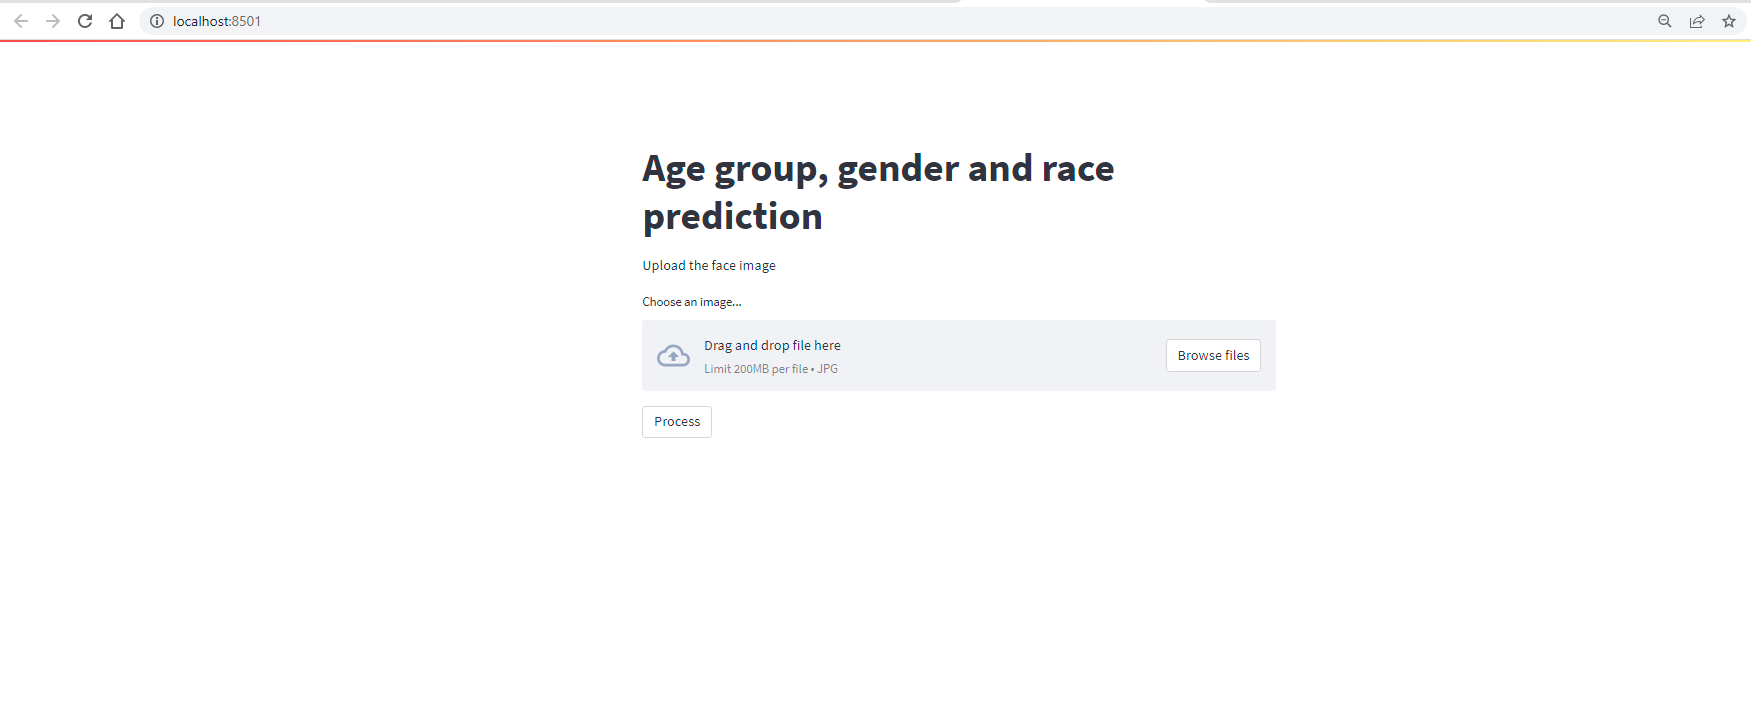

Choose face image from your disk

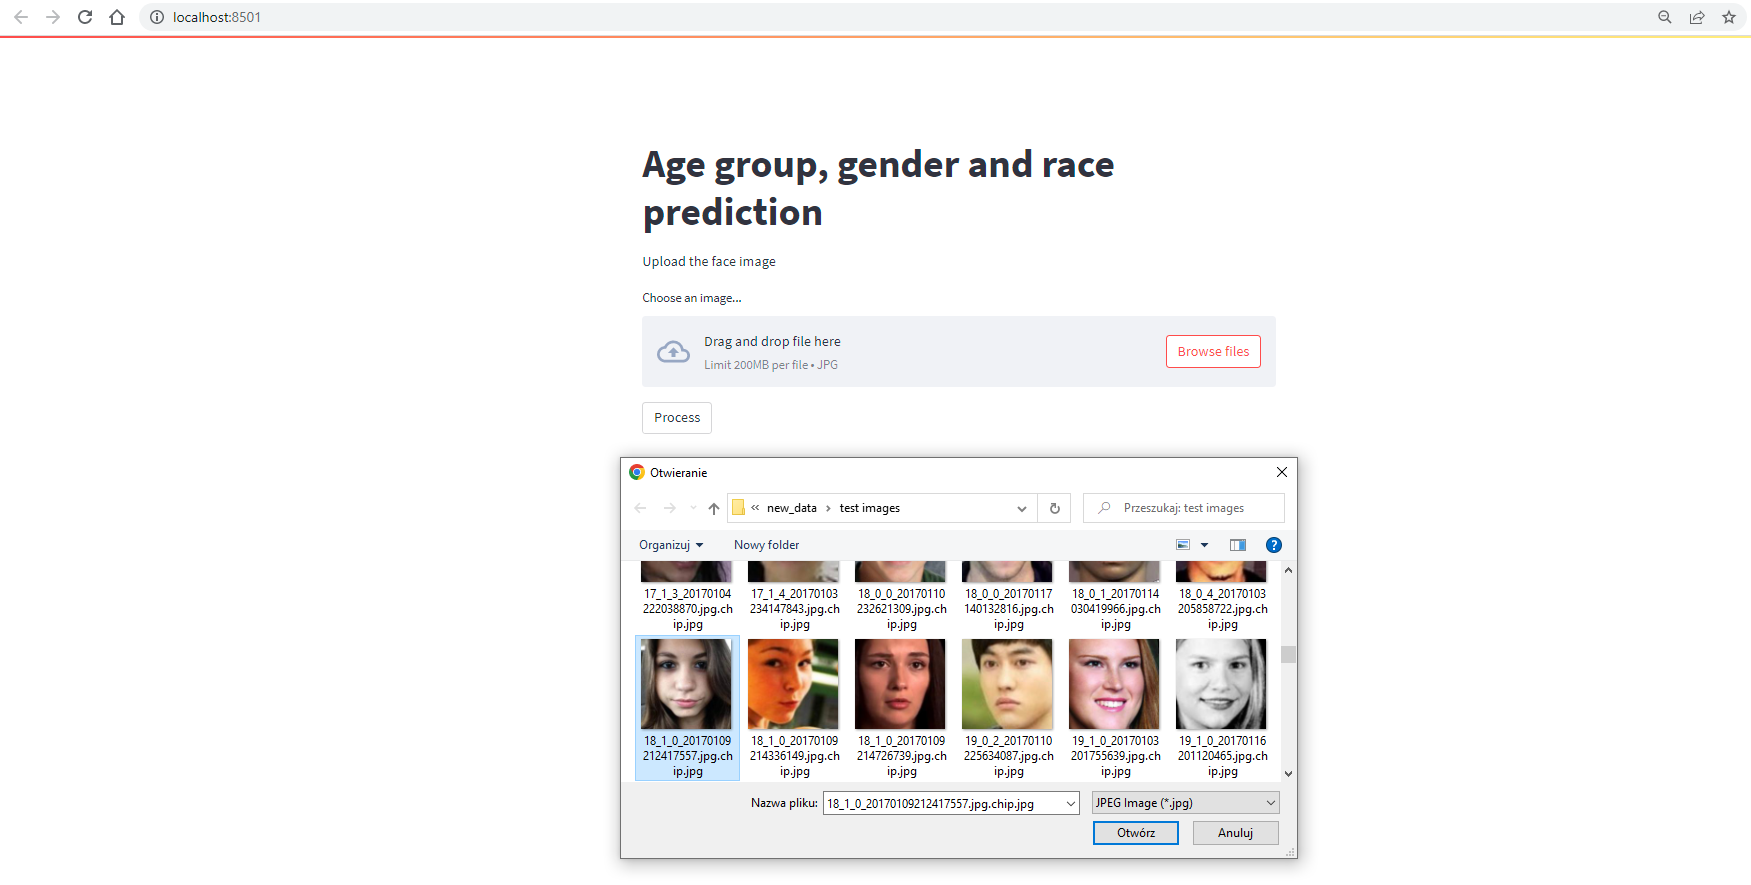

Click "Process" button to show the image and see the results:

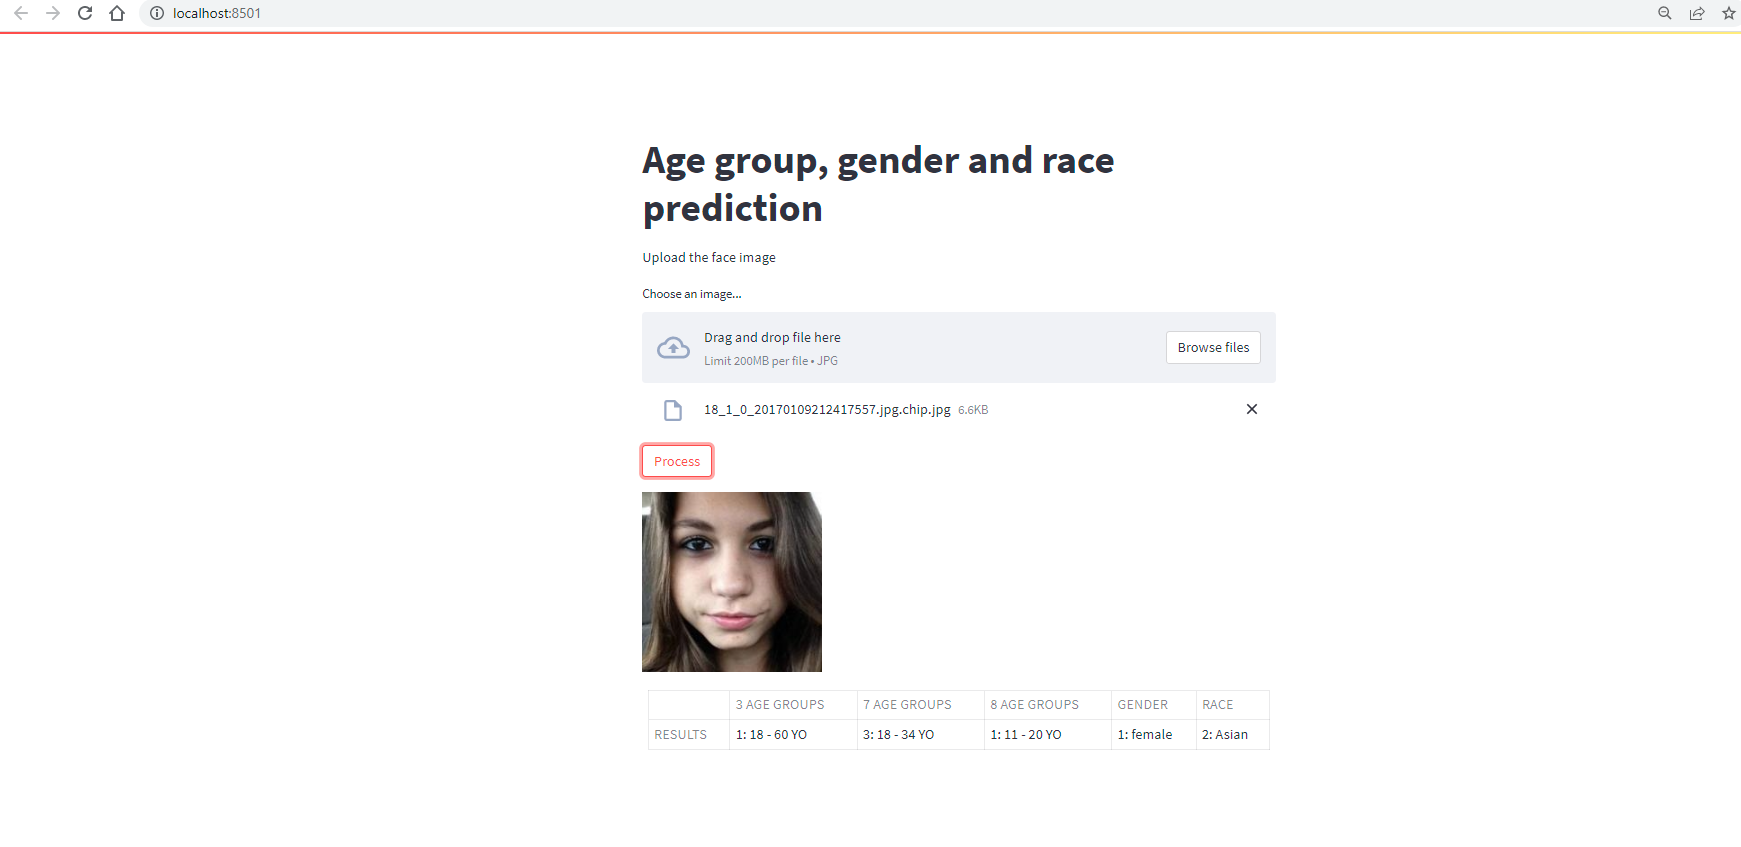